In [2]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Configuración de visualización
plt.style.use('default')  # Cambiamos 'seaborn' por 'default'
sns.set_theme()  # Usamos el tema por defecto de seaborn
%matplotlib inline

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
# Cargar los datos
drivers = pd.read_csv('../data/drivers.csv')
driver_standings = pd.read_csv('../data/driver_standings.csv')
races = pd.read_csv('../data/races.csv')
results = pd.read_csv('../data/results.csv')
seasons = pd.read_csv('../data/seasons.csv')

# Mostrar información básica de los datasets
print("Información de los datasets:")
for name, df in [('drivers', drivers), ('driver_standings', driver_standings), 
                 ('races', races), ('results', results), ('seasons', seasons)]:
    print(f"\n{name.upper()}:")
    print(f"Dimensiones: {df.shape}")
    print("Columnas:")
    print(df.columns.tolist())

Información de los datasets:

DRIVERS:
Dimensiones: (861, 9)
Columnas:
['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url']

DRIVER_STANDINGS:
Dimensiones: (34863, 7)
Columnas:
['driverStandingsId', 'raceId', 'driverId', 'points', 'position', 'positionText', 'wins']

RACES:
Dimensiones: (1125, 18)
Columnas:
['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time']

RESULTS:
Dimensiones: (26759, 18)
Columnas:
['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId']

SEASONS:
Dimensiones: (75, 2)
Columnas:
['year', 'url']


In [5]:
def get_world_champions():
    """
    Obtiene los campeones mundiales de cada temporada
    """
    # Obtener el último GP de cada temporada
    last_races = races.groupby('year')['round'].max().reset_index()
    
    # Obtener las posiciones finales de cada temporada
    # Primero unimos driver_standings con races para obtener el año
    standings_with_year = pd.merge(driver_standings, races[['raceId', 'year', 'round']], 
                                 on='raceId', how='left')
    
    # Luego unimos con last_races para obtener solo las últimas carreras
    final_standings = pd.merge(standings_with_year, last_races, 
                             on=['year', 'round'], how='inner')
    
    # Obtener los campeones (posición 1)
    champions = final_standings[final_standings['position'] == 1]
    
    # Añadir información de los pilotos
    champions = pd.merge(champions, drivers[['driverId', 'forename', 'surname', 'nationality']], 
                        on='driverId', how='left')
    
    # Ordenar por año
    champions = champions.sort_values('year')
    
    return champions

# Obtener los campeones
champions = get_world_champions()

# Mostrar los primeros registros
print("Primeros campeones mundiales:")
print(champions[['year', 'forename', 'surname', 'nationality', 'points']].head())

# Mostrar estadísticas básicas
print("\nEstadísticas de los campeones:")
print(f"Total de campeones únicos: {champions['driverId'].nunique()}")
print(f"Rango de años: {champions['year'].min()} - {champions['year'].max()}")

Primeros campeones mundiales:
    year forename surname nationality  points
56  1950     Nino  Farina     Italian    30.0
55  1951     Juan  Fangio   Argentine    31.0
54  1952  Alberto  Ascari     Italian    36.0
53  1953  Alberto  Ascari     Italian    34.5
57  1954     Juan  Fangio   Argentine    42.0

Estadísticas de los campeones:
Total de campeones únicos: 34
Rango de años: 1950 - 2024


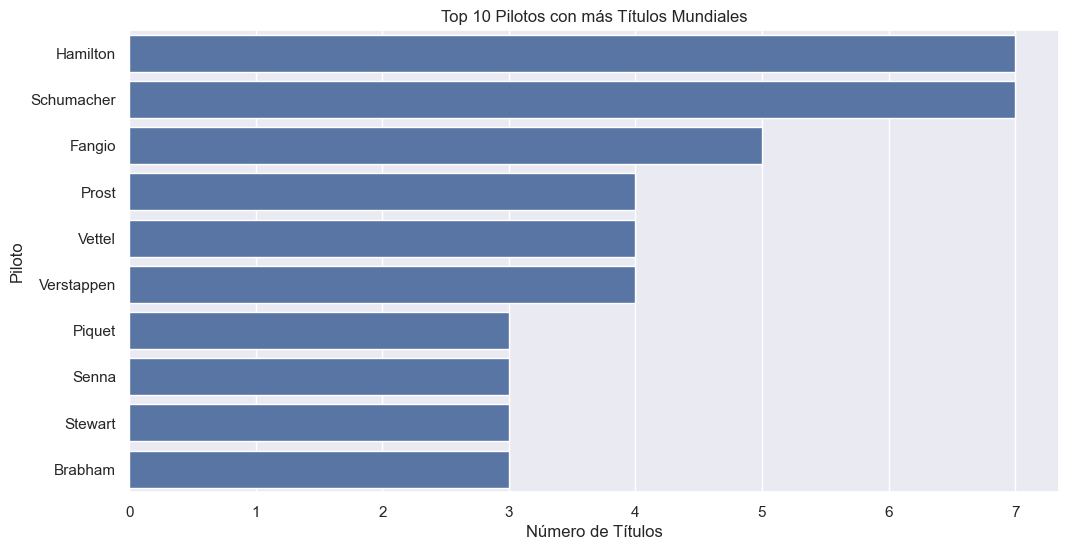

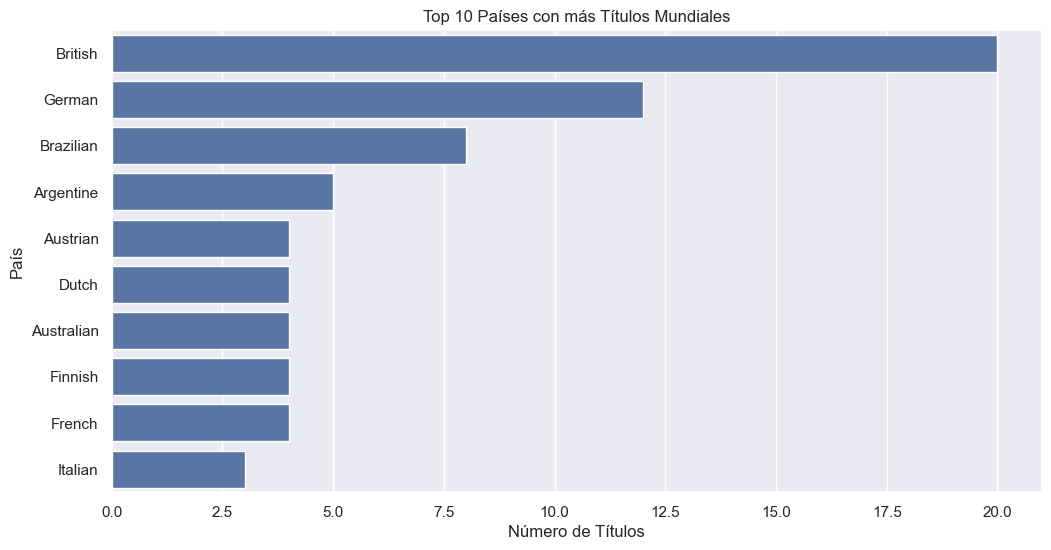

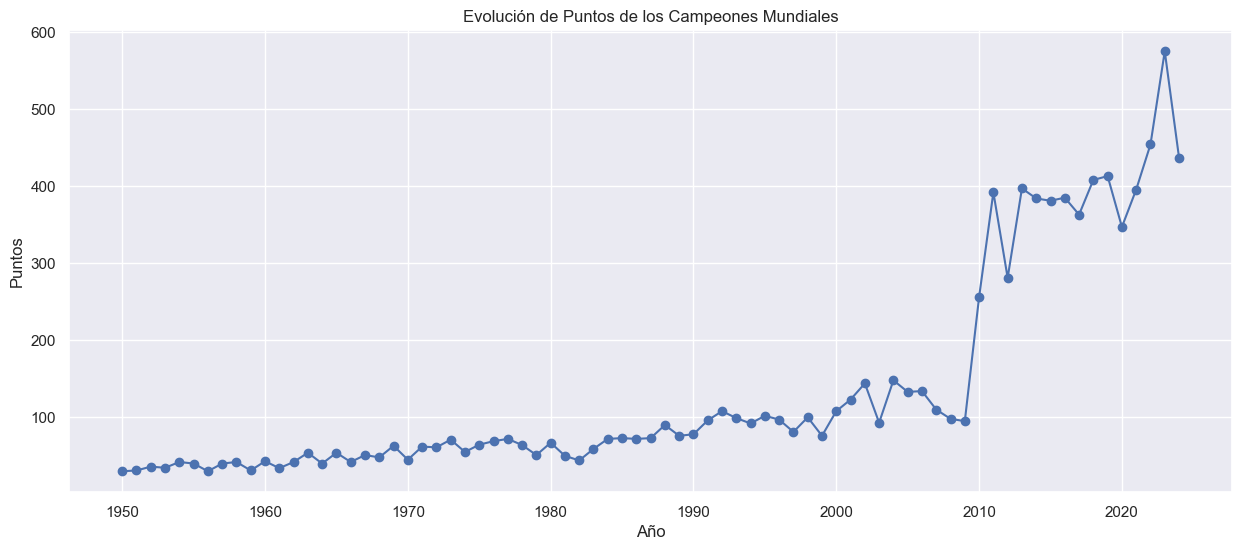


Estadísticas adicionales:
Promedio de puntos por campeón: 134.69
Máximo de puntos obtenidos: 575.0
Mínimo de puntos obtenidos: 30.0


In [6]:
# 1. Distribución de títulos por piloto
champions_by_driver = champions.groupby(['forename', 'surname'])['year'].count().reset_index()
champions_by_driver.columns = ['Nombre', 'Apellido', 'Títulos']
champions_by_driver = champions_by_driver.sort_values('Títulos', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=champions_by_driver.head(10), 
            x='Títulos', y='Apellido')
plt.title('Top 10 Pilotos con más Títulos Mundiales')
plt.xlabel('Número de Títulos')
plt.ylabel('Piloto')
plt.show()

# 2. Distribución de títulos por nacionalidad
champions_by_nationality = champions.groupby('nationality')['year'].count().reset_index()
champions_by_nationality.columns = ['Nacionalidad', 'Títulos']
champions_by_nationality = champions_by_nationality.sort_values('Títulos', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=champions_by_nationality.head(10), 
            x='Títulos', y='Nacionalidad')
plt.title('Top 10 Países con más Títulos Mundiales')
plt.xlabel('Número de Títulos')
plt.ylabel('País')
plt.show()

# 3. Evolución de puntos a lo largo del tiempo
plt.figure(figsize=(15, 6))
plt.plot(champions['year'], champions['points'], marker='o')
plt.title('Evolución de Puntos de los Campeones Mundiales')
plt.xlabel('Año')
plt.ylabel('Puntos')
plt.grid(True)
plt.show()

# Mostrar estadísticas adicionales
print("\nEstadísticas adicionales:")
print(f"Promedio de puntos por campeón: {champions['points'].mean():.2f}")
print(f"Máximo de puntos obtenidos: {champions['points'].max()}")
print(f"Mínimo de puntos obtenidos: {champions['points'].min()}")

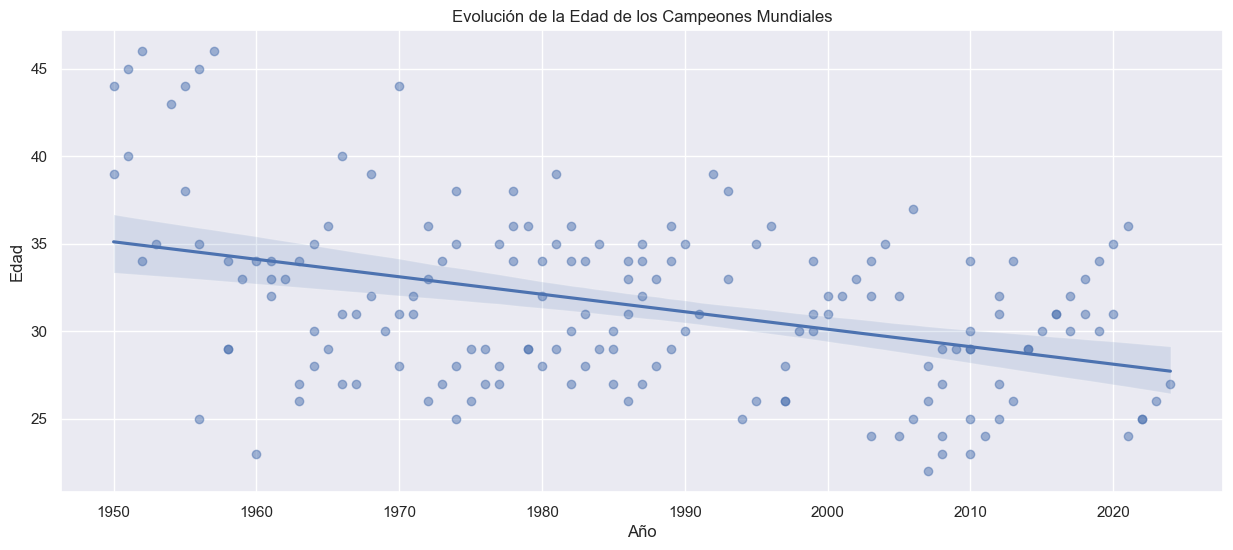


Estadísticas de edad de los campeones:
Edad promedio: 31.47 años
Campeón más joven: 22.00 años
Campeón más veterano: 46.00 años

Top 5 campeones más jóvenes:
 year  forename   surname  age
 2007     Lewis  Hamilton   22
 1960     Bruce   McLaren   23
 2008     Lewis  Hamilton   23
 2010 Sebastian    Vettel   23
 2003      Kimi Räikkönen   24


In [9]:
# Obtener los campeones mundiales
champions = driver_standings[driver_standings['position'] == 1]
champions = champions.merge(races[['raceId', 'year']], on='raceId')
champions = champions.merge(drivers[['driverId', 'forename', 'surname', 'nationality', 'dob']], on='driverId')
champions = champions.sort_values('year')
# 4. Análisis de la edad de los campeones
# Calcular la edad del campeón en cada año
champions['age'] = champions['year'] - pd.to_datetime(champions['dob']).dt.year

# Eliminar duplicados manteniendo solo el primer registro por año y piloto
champions_unique = champions.drop_duplicates(subset=['year', 'driverId'])

# Crear gráfico de dispersión con línea de tendencia
plt.figure(figsize=(15, 6))
sns.regplot(data=champions_unique, x='year', y='age', scatter_kws={'alpha':0.5})
plt.title('Evolución de la Edad de los Campeones Mundiales')
plt.xlabel('Año')
plt.ylabel('Edad')
plt.grid(True)
plt.show()

# Mostrar estadísticas de edad
print("\nEstadísticas de edad de los campeones:")
print(f"Edad promedio: {champions_unique['age'].mean():.2f} años")
print(f"Campeón más joven: {champions_unique['age'].min():.2f} años")
print(f"Campeón más veterano: {champions_unique['age'].max():.2f} años")
print(f"\nTop 5 campeones más jóvenes:")
youngest_champions = champions_unique.nsmallest(5, 'age')[['year', 'forename', 'surname', 'age']]
print(youngest_champions.to_string(index=False))

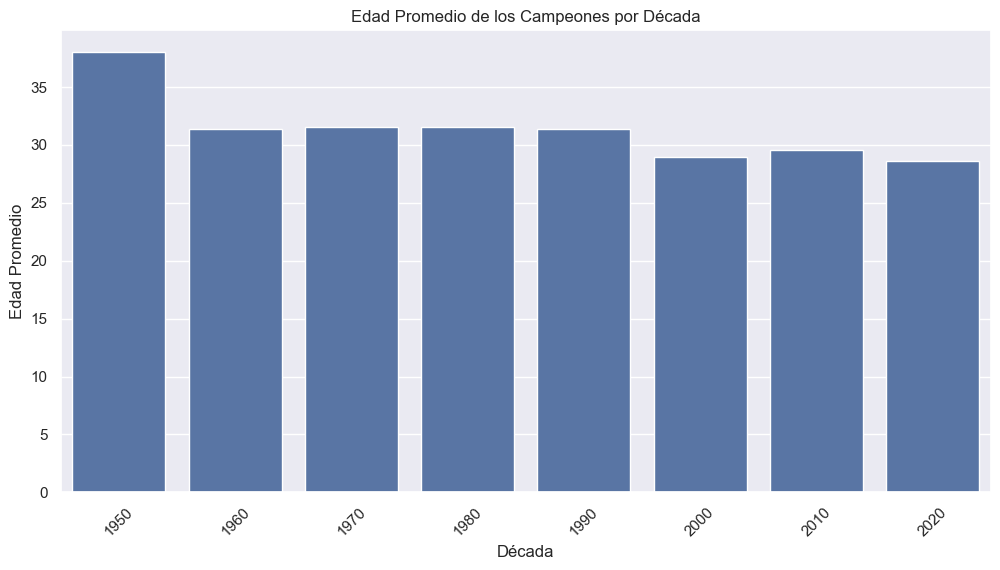

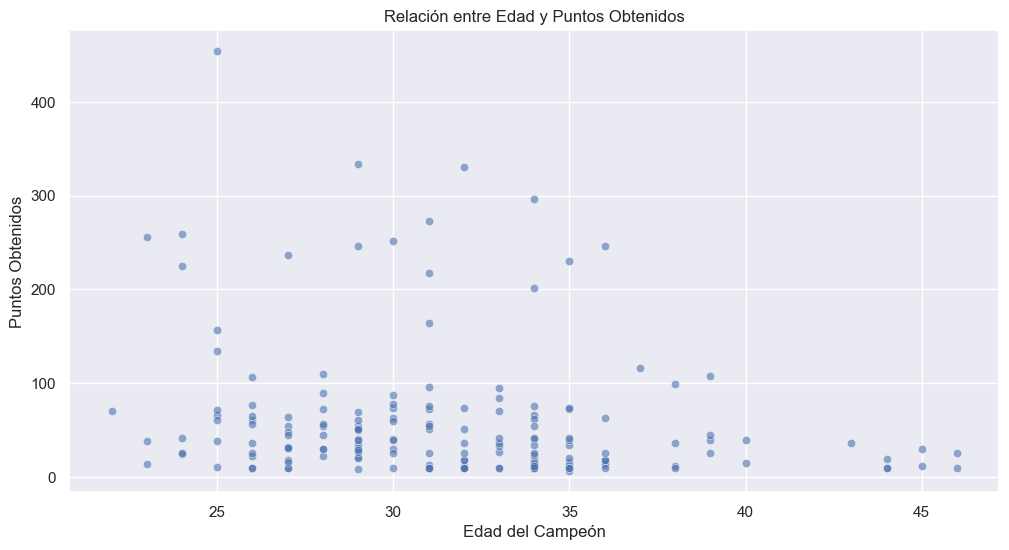


Correlación entre edad y puntos: -0.20


In [13]:
# 5. Análisis de edad promedio por década
# Crear una copia explícita del DataFrame
champions_decade = champions_unique.copy()
champions_decade['decade'] = (champions_decade['year'] // 10) * 10

# Calcular edad promedio por década
age_by_decade = champions_decade.groupby('decade')['age'].mean().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=age_by_decade, x='decade', y='age')
plt.title('Edad Promedio de los Campeones por Década')
plt.xlabel('Década')
plt.ylabel('Edad Promedio')
plt.xticks(rotation=45)
plt.show()

# 6. Relación entre edad y puntos obtenidos
plt.figure(figsize=(12, 6))
sns.scatterplot(data=champions_unique, x='age', y='points', alpha=0.6)
plt.title('Relación entre Edad y Puntos Obtenidos')
plt.xlabel('Edad del Campeón')
plt.ylabel('Puntos Obtenidos')
plt.grid(True)
plt.show()

# Calcular correlación
correlation = champions_unique['age'].corr(champions_unique['points'])
print(f"\nCorrelación entre edad y puntos: {correlation:.2f}")

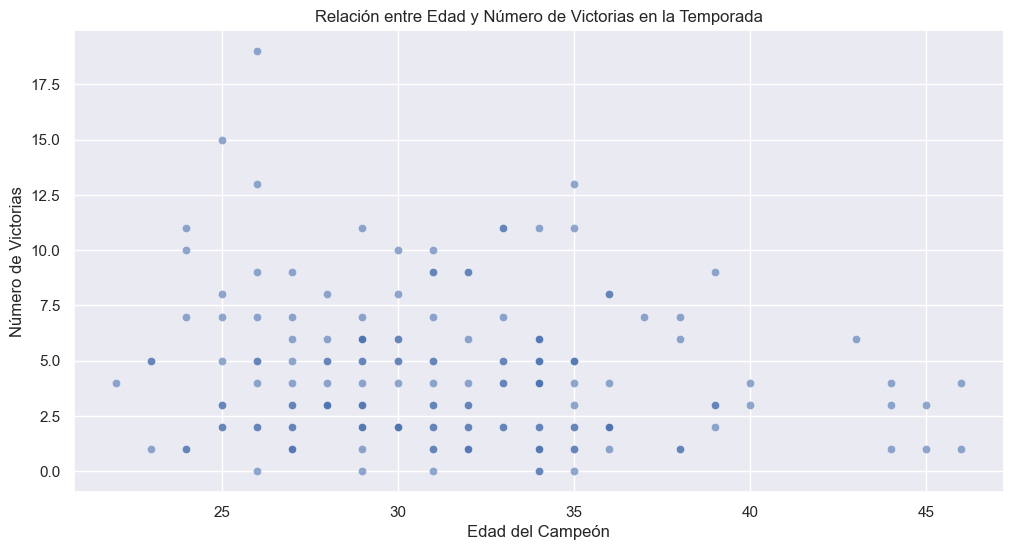


Estadísticas de victorias por campeón:
Promedio de victorias por campeón: 4.40
Máximo de victorias en una temporada: 19.0
Mínimo de victorias en una temporada: 0.0

Top 5 campeones con más victorias en su temporada:
 year  forename    surname  age  num_victorias
 2023       Max Verstappen   26           19.0
 2022       Max Verstappen   25           15.0
 2004   Michael Schumacher   35           13.0
 2013 Sebastian     Vettel   26           13.0
 2002   Michael Schumacher   33           11.0

Primeros registros para verificación:
   year forename surname  num_victorias
0  1950     Nino  Farina            3.0
1  1950     Juan  Fangio            3.0
2  1951     Nino  Farina            1.0
3  1951     Juan  Fangio            3.0
4  1952  Alberto  Ascari            6.0


In [15]:
# 7. Análisis de victorias por edad
# Obtener las victorias por piloto y año
# Primero, asegurémonos de que position sea numérico
results['position'] = pd.to_numeric(results['position'], errors='coerce')

# Obtener las victorias (position = 1)
victorias = results[results['position'] == 1].copy()

# Unir con las carreras para obtener el año
victorias = victorias.merge(races[['raceId', 'year']], on='raceId')

# Contar victorias por piloto y año
victorias_por_piloto = victorias.groupby(['driverId', 'year']).size().reset_index(name='num_victorias')

# Unir con los datos de campeones
champions_victorias = champions_unique.merge(victorias_por_piloto, 
                                           on=['driverId', 'year'], 
                                           how='left')
champions_victorias['num_victorias'] = champions_victorias['num_victorias'].fillna(0)

# Crear gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=champions_victorias, 
                x='age', 
                y='num_victorias', 
                alpha=0.6)
plt.title('Relación entre Edad y Número de Victorias en la Temporada')
plt.xlabel('Edad del Campeón')
plt.ylabel('Número de Victorias')
plt.grid(True)
plt.show()

# Mostrar estadísticas de victorias
print("\nEstadísticas de victorias por campeón:")
print(f"Promedio de victorias por campeón: {champions_victorias['num_victorias'].mean():.2f}")
print(f"Máximo de victorias en una temporada: {champions_victorias['num_victorias'].max()}")
print(f"Mínimo de victorias en una temporada: {champions_victorias['num_victorias'].min()}")

# Mostrar los 5 campeones con más victorias en su temporada
print("\nTop 5 campeones con más victorias en su temporada:")
top_winners = champions_victorias.nlargest(5, 'num_victorias')[['year', 'forename', 'surname', 'age', 'num_victorias']]
print(top_winners.to_string(index=False))

# Mostrar también los primeros registros para verificar los datos
print("\nPrimeros registros para verificación:")
print(champions_victorias[['year', 'forename', 'surname', 'num_victorias']].head())

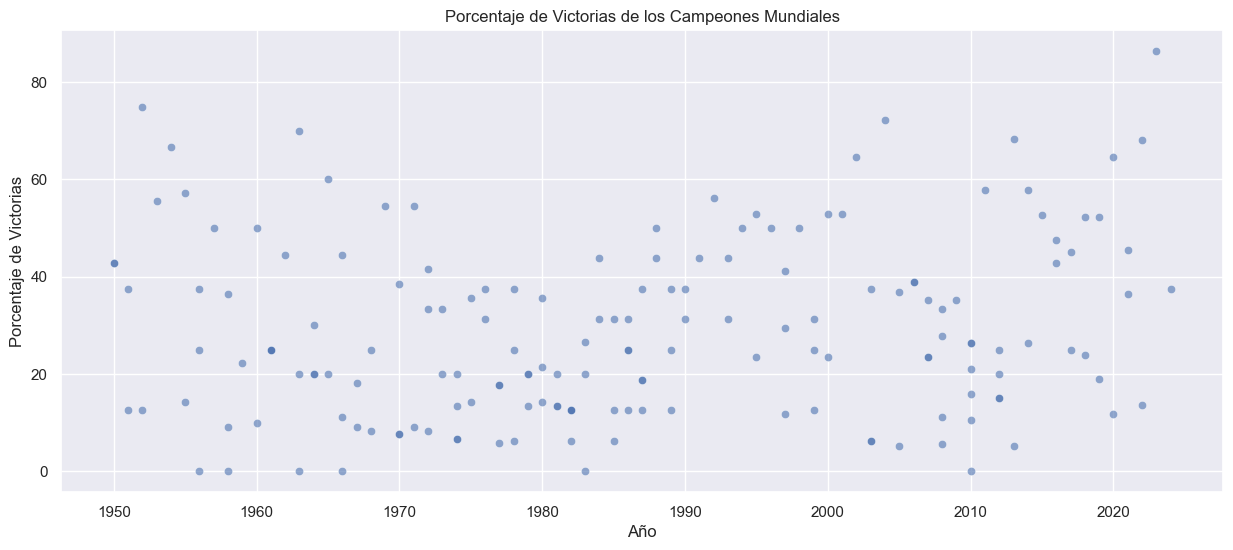


Estadísticas de porcentaje de victorias:
Promedio de porcentaje de victorias: 28.87%
Máximo porcentaje de victorias: 86.36%

Top 5 campeones con mayor porcentaje de victorias:
 year  forename    surname  num_victorias  total_carreras  porcentaje_victorias
 2023       Max Verstappen          19.00              22                 86.36
 1952   Alberto     Ascari           6.00               8                 75.00
 2004   Michael Schumacher          13.00              18                 72.22
 1963       Jim      Clark           7.00              10                 70.00
 2013 Sebastian     Vettel          13.00              19                 68.42


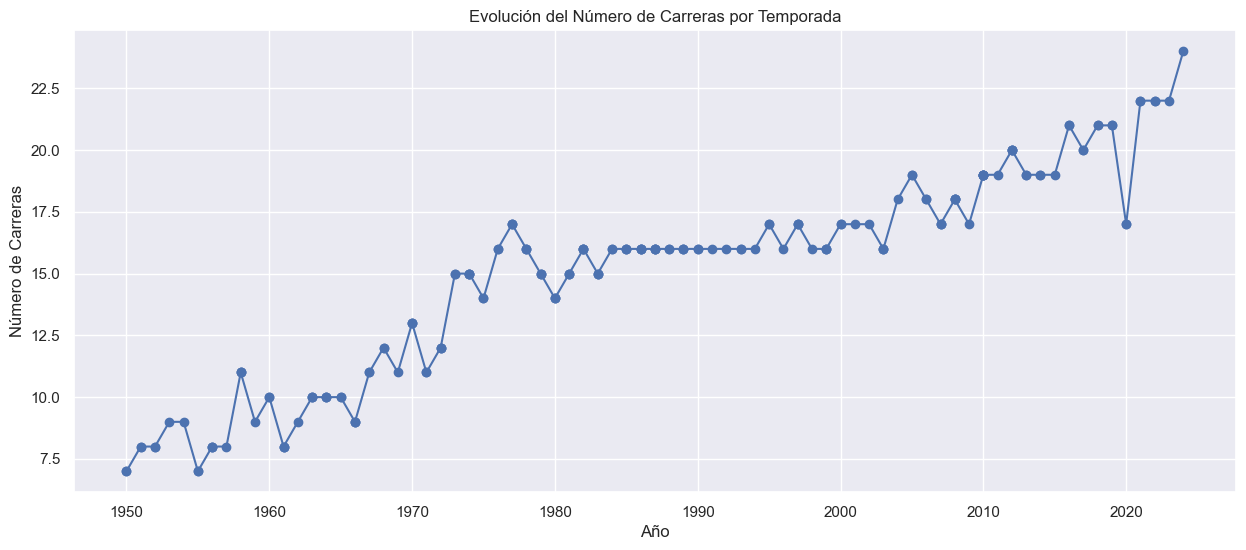


Promedio de porcentaje de victorias por década:
 decade  porcentaje_victorias
   1950                 33.17
   1960                 26.83
   1970                 21.59
   1980                 22.05
   1990                 36.55
   2000                 31.58
   2010                 31.31
   2020                 45.50


In [17]:
# 8. Análisis de porcentaje de victorias
# Calcular número total de carreras por año
carreras_por_año = races.groupby('year').size().reset_index(name='total_carreras')

# Unir con los datos de campeones y victorias
champions_porcentaje = champions_victorias.merge(carreras_por_año, on='year')

# Calcular porcentaje de victorias
champions_porcentaje['porcentaje_victorias'] = (champions_porcentaje['num_victorias'] / 
                                               champions_porcentaje['total_carreras'] * 100)

# Crear gráfico de dispersión
plt.figure(figsize=(15, 6))
sns.scatterplot(data=champions_porcentaje, 
                x='year', 
                y='porcentaje_victorias', 
                alpha=0.6)
plt.title('Porcentaje de Victorias de los Campeones Mundiales')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Victorias')
plt.grid(True)
plt.show()

# Mostrar estadísticas de porcentaje de victorias
print("\nEstadísticas de porcentaje de victorias:")
print(f"Promedio de porcentaje de victorias: {champions_porcentaje['porcentaje_victorias'].mean():.2f}%")
print(f"Máximo porcentaje de victorias: {champions_porcentaje['porcentaje_victorias'].max():.2f}%")

# Mostrar los 5 campeones con mayor porcentaje de victorias
print("\nTop 5 campeones con mayor porcentaje de victorias:")
top_porcentaje = champions_porcentaje.nlargest(5, 'porcentaje_victorias')[
    ['year', 'forename', 'surname', 'num_victorias', 'total_carreras', 'porcentaje_victorias']]
print(top_porcentaje.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))

# Mostrar evolución del número de carreras por temporada
plt.figure(figsize=(15, 6))
plt.plot(champions_porcentaje['year'], champions_porcentaje['total_carreras'], marker='o')
plt.title('Evolución del Número de Carreras por Temporada')
plt.xlabel('Año')
plt.ylabel('Número de Carreras')
plt.grid(True)
plt.show()

# Análisis por décadas
champions_porcentaje['decade'] = (champions_porcentaje['year'] // 10) * 10
porcentaje_por_decada = champions_porcentaje.groupby('decade')['porcentaje_victorias'].mean().reset_index()

print("\nPromedio de porcentaje de victorias por década:")
print(porcentaje_por_decada.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))

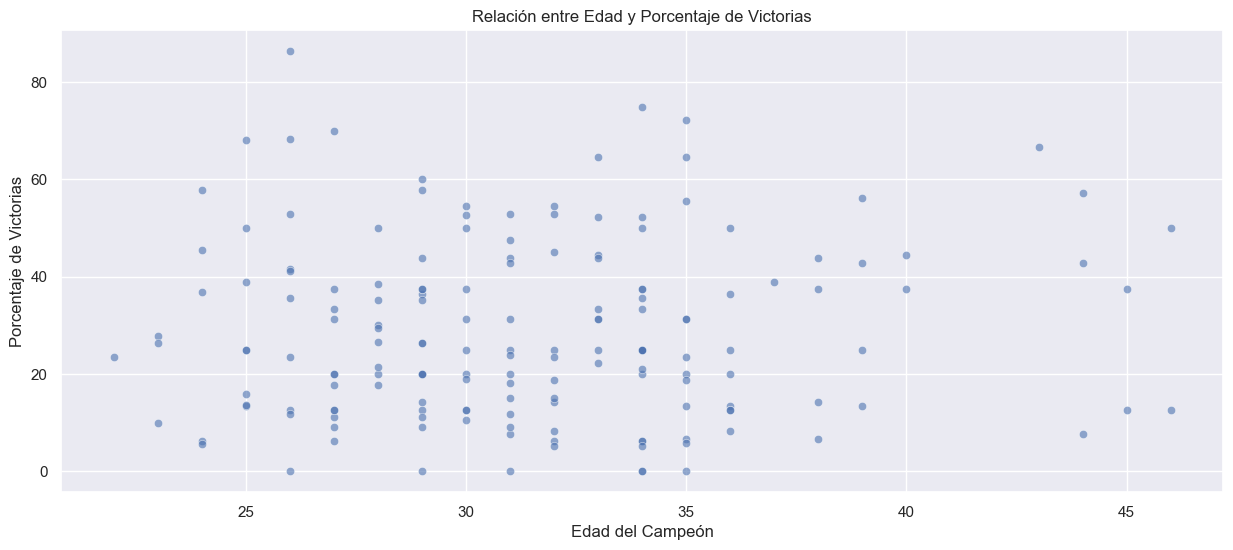


Correlación entre edad y porcentaje de victorias: 0.05

Estadísticas de porcentaje de victorias por rango de edad:
           porcentaje_victorias                    
                           mean    max    min count
rango_edad                                         
20-25                     28.79  68.18   5.56    17
26-30                     29.11  86.36   0.00    59
31-35                     27.96  75.00   0.00    64
36-40                     28.34  56.25   6.67    19
41-45                     37.39  66.67   7.69     6
46-50                     31.25  50.00  12.50     2

Top 5 campeones más jóvenes y sus porcentajes de victorias:
 year  forename   surname  age  porcentaje_victorias
 2007     Lewis  Hamilton   22                 23.53
 1960     Bruce   McLaren   23                 10.00
 2008     Lewis  Hamilton   23                 27.78
 2010 Sebastian    Vettel   23                 26.32
 2003      Kimi Räikkönen   24                  6.25

Top 5 campeones más veteranos y sus 

In [19]:
# 9. Análisis de la relación entre edad y porcentaje de victorias
plt.figure(figsize=(15, 6))
sns.scatterplot(data=champions_porcentaje, 
                x='age', 
                y='porcentaje_victorias', 
                alpha=0.6)
plt.title('Relación entre Edad y Porcentaje de Victorias')
plt.xlabel('Edad del Campeón')
plt.ylabel('Porcentaje de Victorias')
plt.grid(True)
plt.show()

# Calcular correlación
correlacion = champions_porcentaje['age'].corr(champions_porcentaje['porcentaje_victorias'])
print(f"\nCorrelación entre edad y porcentaje de victorias: {correlacion:.2f}")

# Análisis por rangos de edad
champions_porcentaje['rango_edad'] = pd.cut(champions_porcentaje['age'], 
                                          bins=[20, 25, 30, 35, 40, 45, 50],
                                          labels=['20-25', '26-30', '31-35', '36-40', '41-45', '46-50'])

# Calcular estadísticas por rango de edad (usando observed=True)
estadisticas_por_edad = champions_porcentaje.groupby('rango_edad', observed=True).agg({
    'porcentaje_victorias': ['mean', 'max', 'min', 'count']
}).round(2)

print("\nEstadísticas de porcentaje de victorias por rango de edad:")
print(estadisticas_por_edad)

# Mostrar los campeones más jóvenes y más veteranos con sus porcentajes
print("\nTop 5 campeones más jóvenes y sus porcentajes de victorias:")
jovenes = champions_porcentaje.nsmallest(5, 'age')[
    ['year', 'forename', 'surname', 'age', 'porcentaje_victorias']]
print(jovenes.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))

print("\nTop 5 campeones más veteranos y sus porcentajes de victorias:")
veteranos = champions_porcentaje.nlargest(5, 'age')[
    ['year', 'forename', 'surname', 'age', 'porcentaje_victorias']]
print(veteranos.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))

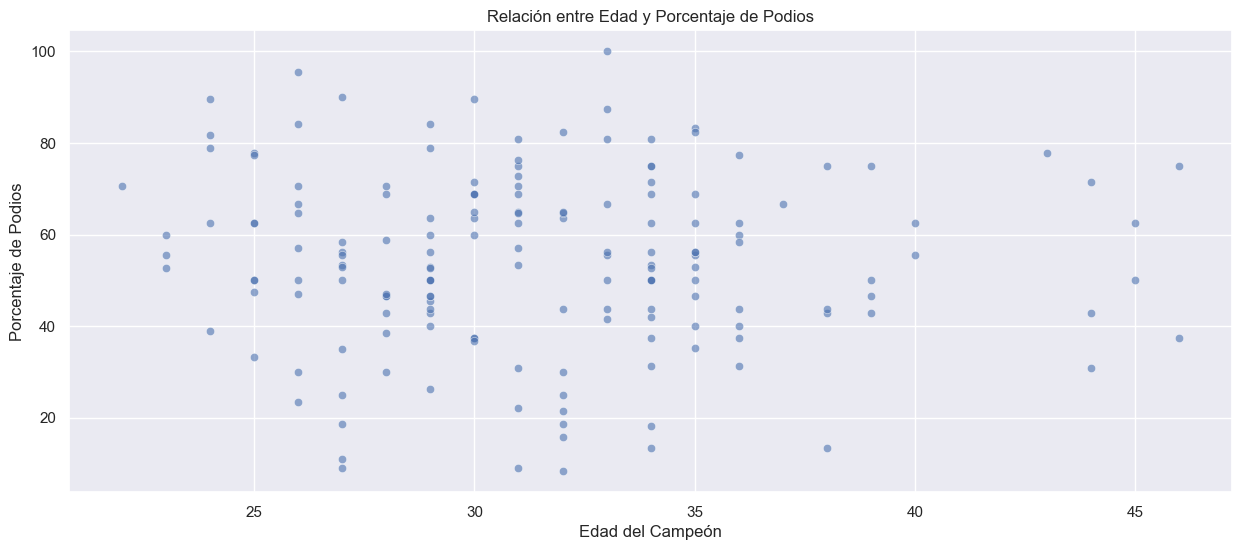


Estadísticas de consistencia (podios):
Promedio de porcentaje de podios: 54.18%
Máximo porcentaje de podios: 100.00%

Top 5 campeones más consistentes (mayor porcentaje de podios):
 year  forename    surname  age  num_podios  total_carreras  porcentaje_podios
 2002   Michael Schumacher   33          17              17             100.00
 2023       Max Verstappen   26          21              22              95.45
 1963       Jim      Clark   27           9              10              90.00
 2011 Sebastian     Vettel   24          17              19              89.47
 2015     Lewis   Hamilton   30          17              19              89.47

Estadísticas de porcentaje de podios por rango de edad:
           porcentaje_podios                     
                        mean     max    min count
rango_edad                                       
20-25                  61.83   89.47  33.33    17
26-30                  52.76   95.45   9.09    59
31-35                  53.94  100.00 

In [21]:
# 10. Análisis de consistencia (podiums)
# Obtener podios (posiciones 1, 2 y 3)
podios = results[results['position'].isin([1, 2, 3])].copy()
podios = podios.merge(races[['raceId', 'year']], on='raceId')

# Calcular número de podios por piloto y año
podios_por_piloto = podios.groupby(['driverId', 'year']).size().reset_index(name='num_podios')

# Unir con los datos de campeones
champions_consistencia = champions_porcentaje.merge(podios_por_piloto, on=['driverId', 'year'], how='left')
champions_consistencia['num_podios'] = champions_consistencia['num_podios'].fillna(0)

# Calcular porcentaje de podios
champions_consistencia['porcentaje_podios'] = (champions_consistencia['num_podios'] / 
                                             champions_consistencia['total_carreras'] * 100)

# Crear gráfico de dispersión
plt.figure(figsize=(15, 6))
sns.scatterplot(data=champions_consistencia, 
                x='age', 
                y='porcentaje_podios', 
                alpha=0.6)
plt.title('Relación entre Edad y Porcentaje de Podios')
plt.xlabel('Edad del Campeón')
plt.ylabel('Porcentaje de Podios')
plt.grid(True)
plt.show()

# Mostrar estadísticas de consistencia
print("\nEstadísticas de consistencia (podios):")
print(f"Promedio de porcentaje de podios: {champions_consistencia['porcentaje_podios'].mean():.2f}%")
print(f"Máximo porcentaje de podios: {champions_consistencia['porcentaje_podios'].max():.2f}%")

# Mostrar los 5 campeones más consistentes
print("\nTop 5 campeones más consistentes (mayor porcentaje de podios):")
top_consistencia = champions_consistencia.nlargest(5, 'porcentaje_podios')[
    ['year', 'forename', 'surname', 'age', 'num_podios', 'total_carreras', 'porcentaje_podios']]
print(top_consistencia.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))

# Análisis por rangos de edad
champions_consistencia['rango_edad'] = pd.cut(champions_consistencia['age'], 
                                            bins=[20, 25, 30, 35, 40, 45, 50],
                                            labels=['20-25', '26-30', '31-35', '36-40', '41-45', '46-50'])

# Calcular estadísticas de consistencia por rango de edad
estadisticas_consistencia = champions_consistencia.groupby('rango_edad', observed=True).agg({
    'porcentaje_podios': ['mean', 'max', 'min', 'count']
}).round(2)

print("\nEstadísticas de porcentaje de podios por rango de edad:")
print(estadisticas_consistencia)

# Comparar porcentaje de victorias vs podios para los 5 campeones más consistentes
print("\nComparación de porcentaje de victorias vs podios para los 5 campeones más consistentes:")
comparacion = champions_consistencia.nlargest(5, 'porcentaje_podios')[
    ['year', 'forename', 'surname', 'porcentaje_victorias', 'porcentaje_podios']]
print(comparacion.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))

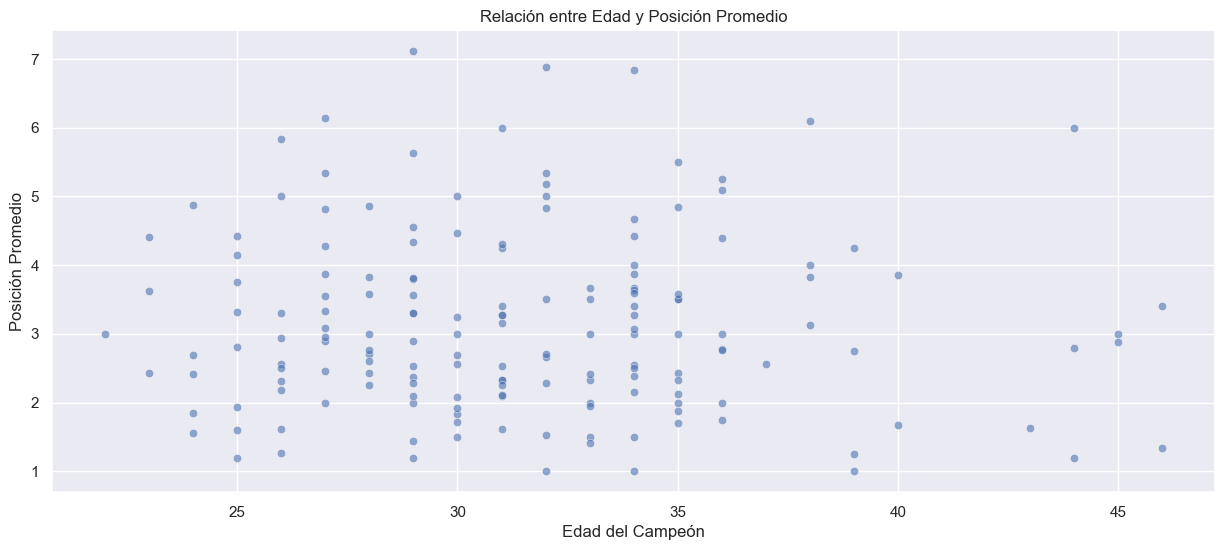


Estadísticas de clasificación promedio:
Promedio general de posición: 3.14
Mejor promedio de posición: 1.00
Peor promedio de posición: 7.11

Top 5 campeones con mejor posición promedio:
 year forename surname  age  posicion_promedio  mejor_posicion  peor_posicion  carreras
 1950     Juan  Fangio   39               1.00            1.00           1.00         3
 1952  Alberto  Ascari   34               1.00            1.00           1.00         6
 1968      Jim   Clark   32               1.00            1.00           1.00         1
 1955     Juan  Fangio   44               1.20            1.00           2.00         5
 1958 Stirling    Moss   29               1.20            1.00           2.00         5

Estadísticas de posición promedio por rango de edad:
           posicion_promedio                  
                        mean   min   max count
rango_edad                                    
20-25                   2.94  1.20  4.88    17
26-30                   3.19  1.20  7.11   

In [22]:
# 11. Análisis de clasificaciones promedio
# Obtener las clasificaciones de cada piloto en sus carreras
clasificaciones = results.merge(races[['raceId', 'year']], on='raceId')

# Calcular clasificación promedio por piloto y año
clasificaciones_promedio = clasificaciones.groupby(['driverId', 'year'])['position'].agg(['mean', 'min', 'max', 'count']).reset_index()
clasificaciones_promedio.columns = ['driverId', 'year', 'posicion_promedio', 'mejor_posicion', 'peor_posicion', 'carreras']

# Unir con los datos de campeones
champions_clasificacion = champions_consistencia.merge(clasificaciones_promedio, on=['driverId', 'year'], how='left')

# Crear gráfico de dispersión
plt.figure(figsize=(15, 6))
sns.scatterplot(data=champions_clasificacion, 
                x='age', 
                y='posicion_promedio', 
                alpha=0.6)
plt.title('Relación entre Edad y Posición Promedio')
plt.xlabel('Edad del Campeón')
plt.ylabel('Posición Promedio')
plt.grid(True)
plt.show()

# Mostrar estadísticas de clasificación
print("\nEstadísticas de clasificación promedio:")
print(f"Promedio general de posición: {champions_clasificacion['posicion_promedio'].mean():.2f}")
print(f"Mejor promedio de posición: {champions_clasificacion['posicion_promedio'].min():.2f}")
print(f"Peor promedio de posición: {champions_clasificacion['posicion_promedio'].max():.2f}")

# Mostrar los 5 campeones con mejor posición promedio
print("\nTop 5 campeones con mejor posición promedio:")
top_posicion = champions_clasificacion.nsmallest(5, 'posicion_promedio')[
    ['year', 'forename', 'surname', 'age', 'posicion_promedio', 'mejor_posicion', 'peor_posicion', 'carreras']]
print(top_posicion.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))

# Análisis por rangos de edad
estadisticas_posicion = champions_clasificacion.groupby('rango_edad', observed=True).agg({
    'posicion_promedio': ['mean', 'min', 'max', 'count']
}).round(2)

print("\nEstadísticas de posición promedio por rango de edad:")
print(estadisticas_posicion)

# Mostrar los campeones más consistentes en clasificación
print("\nTop 5 campeones más consistentes en clasificación (menor diferencia entre mejor y peor posición):")
champions_clasificacion['rango_posiciones'] = champions_clasificacion['peor_posicion'] - champions_clasificacion['mejor_posicion']
top_consistencia_posicion = champions_clasificacion.nsmallest(5, 'rango_posiciones')[
    ['year', 'forename', 'surname', 'age', 'posicion_promedio', 'mejor_posicion', 'peor_posicion', 'carreras']]
print(top_consistencia_posicion.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))


Estadísticas de dominación por década:
        Posición_Promedio  Porcentaje_Victorias  Porcentaje_Podios  \
decade                                                               
1950                 2.40                 33.17              55.76   
1960                 3.00                 26.83              47.70   
1970                 3.73                 21.59              43.88   
1980                 3.37                 22.05              48.83   
1990                 2.56                 36.55              57.59   
2000                 3.21                 31.58              61.81   
2010                 3.36                 31.31              62.27   
2020                 2.64                 45.50              73.40   

        Carreras_Por_Temporada  Victorias_Por_Temporada  Podios_Por_Temporada  
decade                                                                         
1950                      8.44                     2.72                  4.67  
1960               

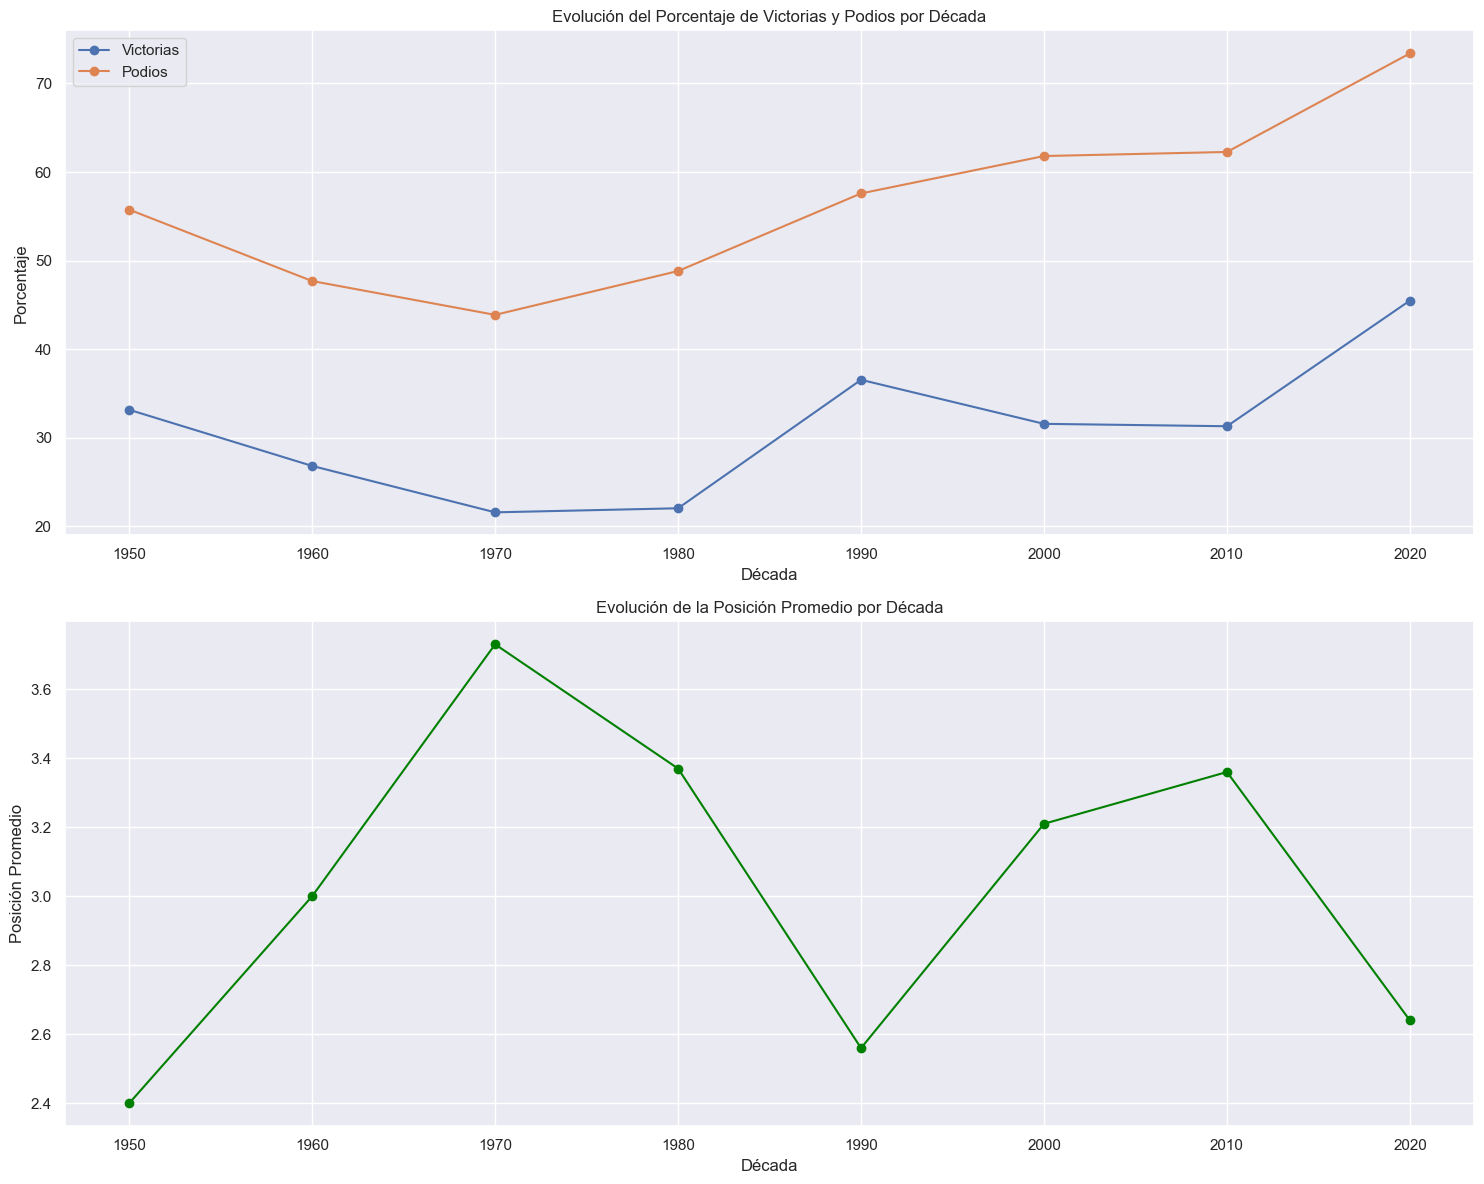


Pilotos más dominantes por década (mayor porcentaje de victorias):

Década 1950:
 year forename surname  porcentaje_victorias  porcentaje_podios  posicion_promedio
 1952  Alberto  Ascari                 75.00              75.00               1.00

Década 1960:
 year forename surname  porcentaje_victorias  porcentaje_podios  posicion_promedio
 1963      Jim   Clark                 70.00              90.00               2.00

Década 1970:
 year forename surname  porcentaje_victorias  porcentaje_podios  posicion_promedio
 1971   Jackie Stewart                 54.55              63.64               2.67

Década 1980:
 year forename surname  porcentaje_victorias  porcentaje_podios  posicion_promedio
 1988   Ayrton   Senna                 50.00              68.75               2.43

Década 1990:
 year forename surname  porcentaje_victorias  porcentaje_podios  posicion_promedio
 1992    Nigel Mansell                 56.25              75.00               1.25

Década 2000:
 year forename    

In [24]:
# 12. Análisis de dominación por década
# Crear columna de década
champions_clasificacion['decade'] = (champions_clasificacion['year'] // 10) * 10

# Calcular estadísticas por década
estadisticas_decada = champions_clasificacion.groupby('decade').agg({
    'posicion_promedio': 'mean',
    'porcentaje_victorias': 'mean',
    'porcentaje_podios': 'mean',
    'total_carreras': 'mean',
    'num_victorias': 'mean',
    'num_podios': 'mean'
}).round(2)

# Renombrar columnas
estadisticas_decada.columns = ['Posición_Promedio', 'Porcentaje_Victorias', 'Porcentaje_Podios', 
                             'Carreras_Por_Temporada', 'Victorias_Por_Temporada', 'Podios_Por_Temporada']

print("\nEstadísticas de dominación por década:")
print(estadisticas_decada)

# Crear gráficos de evolución
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Gráfico 1: Evolución de porcentajes
ax1.plot(estadisticas_decada.index, estadisticas_decada['Porcentaje_Victorias'], marker='o', label='Victorias')
ax1.plot(estadisticas_decada.index, estadisticas_decada['Porcentaje_Podios'], marker='o', label='Podios')
ax1.set_title('Evolución del Porcentaje de Victorias y Podios por Década')
ax1.set_xlabel('Década')
ax1.set_ylabel('Porcentaje')
ax1.grid(True)
ax1.legend()

# Gráfico 2: Evolución de posición promedio
ax2.plot(estadisticas_decada.index, estadisticas_decada['Posición_Promedio'], marker='o', color='green')
ax2.set_title('Evolución de la Posición Promedio por Década')
ax2.set_xlabel('Década')
ax2.set_ylabel('Posición Promedio')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Mostrar los pilotos más dominantes por década
print("\nPilotos más dominantes por década (mayor porcentaje de victorias):")
for decade in sorted(champions_clasificacion['decade'].unique()):
    decada_data = champions_clasificacion[champions_clasificacion['decade'] == decade]
    mejor_piloto = decada_data.nlargest(1, 'porcentaje_victorias')
    print(f"\nDécada {decade}:")
    print(mejor_piloto[['year', 'forename', 'surname', 'porcentaje_victorias', 'porcentaje_podios', 'posicion_promedio']].to_string(
        index=False, float_format=lambda x: '{:.2f}'.format(x)))

# Mostrar evolución del número de carreras
print("\nEvolución del número de carreras por temporada:")
carreras_por_decada = champions_clasificacion.groupby('decade')['total_carreras'].agg(['mean', 'min', 'max']).round(2)
print(carreras_por_decada)


Top 10 temporadas más competitivas (menor diferencia de puntos):
 year forename   surname  puntos_campeon  puntos_subcampeon  diferencia_puntos
 1984    Alain     Prost           72.00              71.50               0.50
 1984     Niki     Lauda           72.00              71.50               0.50
 1953  Alberto    Ascari           34.50              33.50               1.00
 1958 Stirling      Moss           42.00              41.00               1.00
 1958     Mike  Hawthorn           42.00              41.00               1.00
 1958    Luigi     Musso           42.00              41.00               1.00
 1961     Phil      Hill           34.00              33.00               1.00
 1961 Wolfgang von Trips           34.00              33.00               1.00
 1961 Stirling      Moss           34.00              33.00               1.00
 1964   Graham      Hill           40.00              39.00               1.00

Top 10 temporadas con más pilotos competitivos (>=80% de puntos 

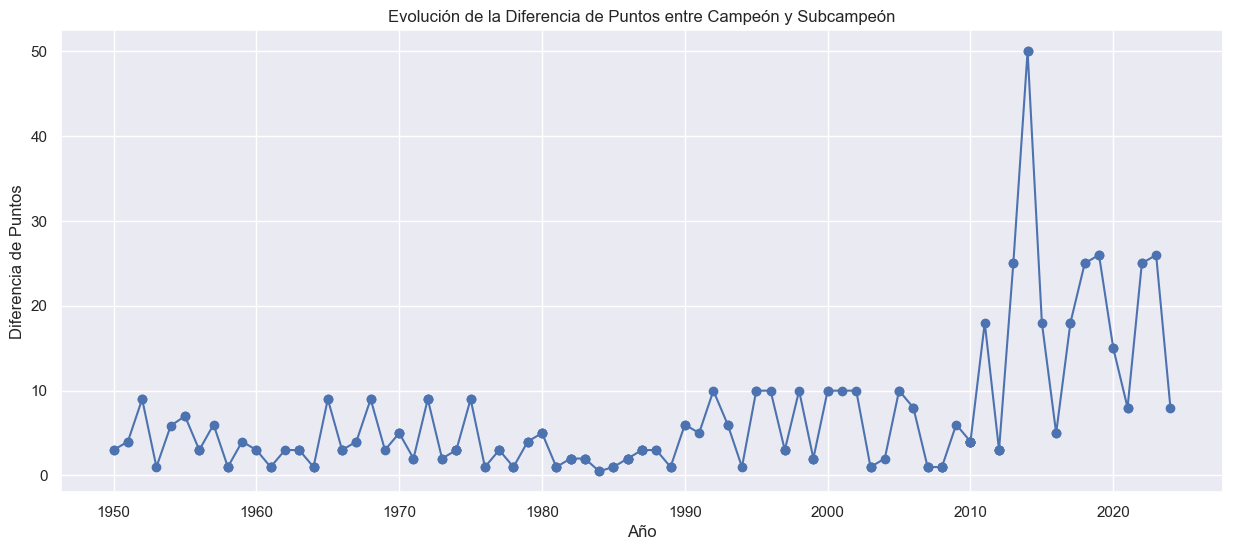


Estadísticas de competitividad:
Promedio de diferencia de puntos: 6.08
Máxima diferencia de puntos: 50.00
Mínima diferencia de puntos: 0.50
Promedio de pilotos competitivos por temporada: 6.35


In [26]:
# 13. Análisis de batallas por el título
# Obtener los puntos de todos los pilotos en cada temporada
puntos_por_temporada = driver_standings.merge(races[['raceId', 'year']], on='raceId')
puntos_por_temporada = puntos_por_temporada.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')

# Calcular puntos máximos por temporada
puntos_maximos = puntos_por_temporada.groupby('year')['points'].max().reset_index()
puntos_maximos.columns = ['year', 'puntos_campeon']

# Calcular puntos del subcampeón
puntos_subcampeon = puntos_por_temporada.merge(puntos_maximos, on='year')
puntos_subcampeon = puntos_subcampeon[puntos_subcampeon['points'] < puntos_subcampeon['puntos_campeon']]
puntos_subcampeon = puntos_subcampeon.groupby('year')['points'].max().reset_index()
puntos_subcampeon.columns = ['year', 'puntos_subcampeon']

# Unir datos
batallas_titulo = puntos_maximos.merge(puntos_subcampeon, on='year')
batallas_titulo['diferencia_puntos'] = batallas_titulo['puntos_campeon'] - batallas_titulo['puntos_subcampeon']

# Unir con datos de campeones
batallas_titulo = batallas_titulo.merge(champions_clasificacion[['year', 'forename', 'surname']], on='year')

# Mostrar las temporadas más competitivas (menor diferencia de puntos)
print("\nTop 10 temporadas más competitivas (menor diferencia de puntos):")
top_competitivas = batallas_titulo.nsmallest(10, 'diferencia_puntos')[
    ['year', 'forename', 'surname', 'puntos_campeon', 'puntos_subcampeon', 'diferencia_puntos']]
print(top_competitivas.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))

# Calcular número de pilotos con más del 80% de los puntos del campeón
puntos_por_temporada = puntos_por_temporada.merge(puntos_maximos, on='year')
puntos_por_temporada['porcentaje_puntos'] = (puntos_por_temporada['points'] / puntos_por_temporada['puntos_campeon'] * 100)
pilotos_competitivos = puntos_por_temporada[puntos_por_temporada['porcentaje_puntos'] >= 80].groupby('year').size().reset_index(name='num_pilotos_competitivos')

# Mostrar temporadas con más pilotos competitivos
print("\nTop 10 temporadas con más pilotos competitivos (>=80% de puntos del campeón):")
top_pilotos = pilotos_competitivos.nlargest(10, 'num_pilotos_competitivos')
print(top_pilotos.to_string(index=False))

# Crear gráfico de evolución de la competitividad
plt.figure(figsize=(15, 6))
plt.plot(batallas_titulo['year'], batallas_titulo['diferencia_puntos'], marker='o')
plt.title('Evolución de la Diferencia de Puntos entre Campeón y Subcampeón')
plt.xlabel('Año')
plt.ylabel('Diferencia de Puntos')
plt.grid(True)
plt.show()

# Mostrar estadísticas generales
print("\nEstadísticas de competitividad:")
print(f"Promedio de diferencia de puntos: {batallas_titulo['diferencia_puntos'].mean():.2f}")
print(f"Máxima diferencia de puntos: {batallas_titulo['diferencia_puntos'].max():.2f}")
print(f"Mínima diferencia de puntos: {batallas_titulo['diferencia_puntos'].min():.2f}")
print(f"Promedio de pilotos competitivos por temporada: {pilotos_competitivos['num_pilotos_competitivos'].mean():.2f}")


Top 10 campeones más dominantes (índice de dominación):
 year  forename    surname  indice_dominacion  porcentaje_victorias  porcentaje_podios  posicion_promedio
 2023       Max Verstappen              91.27                 86.36              95.45               1.27
 2002   Michael Schumacher              83.76                 64.71             100.00               1.41
 1963       Jim      Clark              82.00                 70.00              90.00               2.00
 1952   Alberto     Ascari              81.00                 75.00              75.00               1.00
 2004   Michael Schumacher              80.71                 72.22              83.33               2.12
 2013 Sebastian     Vettel              80.21                 68.42              84.21               1.61
 2020     Lewis   Hamilton              77.78                 64.71              82.35               1.88
 2011 Sebastian     Vettel              77.67                 57.89              89.47         

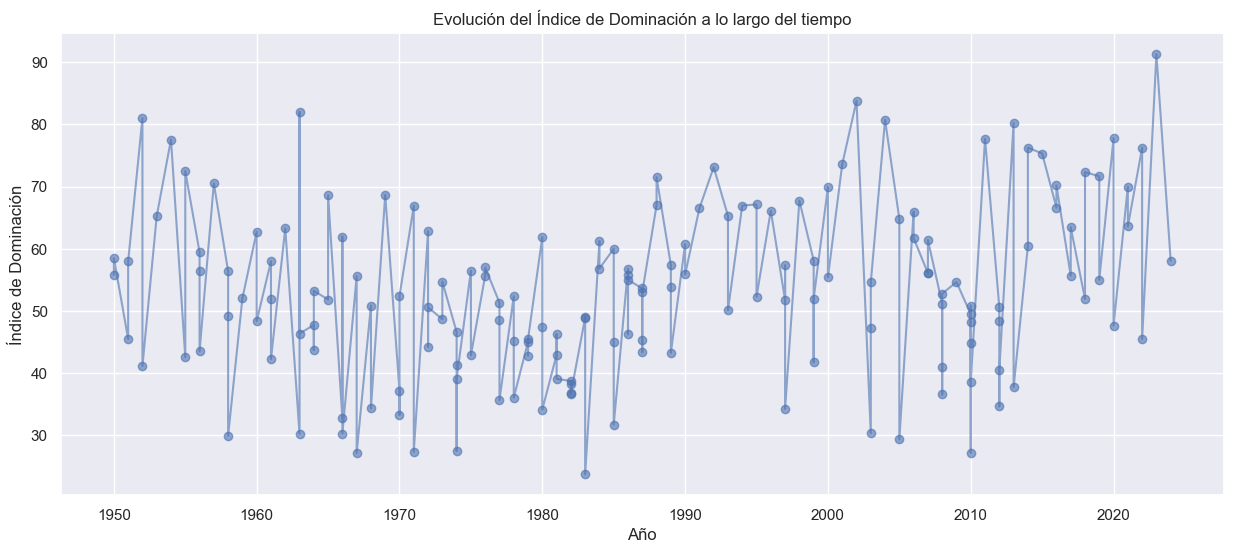


Campeones más dominantes por década:

Década 1950:
 year forename surname  indice_dominacion  porcentaje_victorias  porcentaje_podios  posicion_promedio
 1952  Alberto  Ascari              81.00                 75.00              75.00               1.00

Década 1960:
 year forename surname  indice_dominacion  porcentaje_victorias  porcentaje_podios  posicion_promedio
 1963      Jim   Clark              82.00                 70.00              90.00               2.00

Década 1970:
 year forename surname  indice_dominacion  porcentaje_victorias  porcentaje_podios  posicion_promedio
 1971   Jackie Stewart              66.91                 54.55              63.64               2.67

Década 1980:
 year forename surname  indice_dominacion  porcentaje_victorias  porcentaje_podios  posicion_promedio
 1988    Alain   Prost              71.50                 43.75              87.50               1.50

Década 1990:
 year forename surname  indice_dominacion  porcentaje_victorias  porcentaje_

In [28]:
# 14. Análisis de dominación total
# Crear índice de dominación combinando diferentes métricas
champions_dominacion = champions_clasificacion.copy()

# Normalizar cada métrica (convertir a escala 0-1)
champions_dominacion['indice_victorias'] = champions_dominacion['porcentaje_victorias'] / 100
champions_dominacion['indice_podios'] = champions_dominacion['porcentaje_podios'] / 100
champions_dominacion['indice_posicion'] = 1 - (champions_dominacion['posicion_promedio'] / 20)  # Asumiendo 20 como máximo

# Calcular índice de dominación total (promedio de los tres índices)
champions_dominacion['indice_dominacion'] = (
    champions_dominacion['indice_victorias'] * 0.4 +  # 40% peso a victorias
    champions_dominacion['indice_podios'] * 0.3 +     # 30% peso a podios
    champions_dominacion['indice_posicion'] * 0.3     # 30% peso a posición promedio
) * 100  # Convertir a porcentaje

# Mostrar los 10 campeones más dominantes
print("\nTop 10 campeones más dominantes (índice de dominación):")
top_dominacion = champions_dominacion.nlargest(10, 'indice_dominacion')[
    ['year', 'forename', 'surname', 'indice_dominacion', 
     'porcentaje_victorias', 'porcentaje_podios', 'posicion_promedio']]
print(top_dominacion.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))

# Análisis por década
estadisticas_dominacion = champions_dominacion.groupby('decade')['indice_dominacion'].agg(['mean', 'max', 'min']).round(2)
print("\nEstadísticas de dominación por década:")
print(estadisticas_dominacion)

# Crear gráfico de evolución de la dominación
plt.figure(figsize=(15, 6))
plt.plot(champions_dominacion['year'], champions_dominacion['indice_dominacion'], marker='o', alpha=0.6)
plt.title('Evolución del Índice de Dominación a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Índice de Dominación')
plt.grid(True)
plt.show()

# Mostrar los campeones más dominantes por década
print("\nCampeones más dominantes por década:")
for decade in sorted(champions_dominacion['decade'].unique()):
    decada_data = champions_dominacion[champions_dominacion['decade'] == decade]
    mejor_piloto = decada_data.nlargest(1, 'indice_dominacion')
    print(f"\nDécada {decade}:")
    print(mejor_piloto[['year', 'forename', 'surname', 'indice_dominacion', 
                       'porcentaje_victorias', 'porcentaje_podios', 'posicion_promedio']].to_string(
        index=False, float_format=lambda x: '{:.2f}'.format(x)))

# Mostrar estadísticas generales
print("\nEstadísticas generales de dominación:")
print(f"Promedio de índice de dominación: {champions_dominacion['indice_dominacion'].mean():.2f}")
print(f"Máximo índice de dominación: {champions_dominacion['indice_dominacion'].max():.2f}")
print(f"Mínimo índice de dominación: {champions_dominacion['indice_dominacion'].min():.2f}")

In [34]:
# 16. Análisis de pilotos más completos (versión corregida)
# Obtener datos de poles y vueltas rápidas
qualifying = results[results['grid'] == 1].groupby(['driverId', 'raceId']).size().reset_index(name='pole')
fastest_laps = results[results['fastestLapTime'].notna()].groupby(['driverId', 'raceId']).size().reset_index(name='vuelta_rapida')

# Unir con los datos de carreras para obtener el año
qualifying = qualifying.merge(races[['raceId', 'year']], on='raceId')
fastest_laps = fastest_laps.merge(races[['raceId', 'year']], on='raceId')

# Calcular totales por piloto y año
poles_por_piloto = qualifying.groupby(['driverId', 'year']).size().reset_index(name='num_poles')
vueltas_por_piloto = fastest_laps.groupby(['driverId', 'year']).size().reset_index(name='num_vueltas_rapidas')

# Unir todos los datos
champions_completos = champions_clasificacion.merge(poles_por_piloto, on=['driverId', 'year'], how='left')
champions_completos = champions_completos.merge(vueltas_por_piloto, on=['driverId', 'year'], how='left')

# Rellenar valores nulos con 0
champions_completos['num_poles'] = champions_completos['num_poles'].fillna(0)
champions_completos['num_vueltas_rapidas'] = champions_completos['num_vueltas_rapidas'].fillna(0)

# Calcular porcentajes
champions_completos['porcentaje_poles'] = (champions_completos['num_poles'] / champions_completos['total_carreras'] * 100)
champions_completos['porcentaje_vueltas_rapidas'] = (champions_completos['num_vueltas_rapidas'] / champions_completos['total_carreras'] * 100)

# Crear índice de completitud (promedio de todos los porcentajes)
champions_completos['indice_completitud'] = (
    champions_completos['porcentaje_victorias'] * 0.3 +    # 30% victorias
    champions_completos['porcentaje_podios'] * 0.2 +       # 20% podios
    champions_completos['porcentaje_poles'] * 0.3 +        # 30% poles
    champions_completos['porcentaje_vueltas_rapidas'] * 0.2  # 20% vueltas rápidas
)

# Mostrar los 10 pilotos más completos
print("\nTop 10 pilotos más completos (índice de completitud):")
top_completos = champions_completos.nlargest(10, 'indice_completitud')[
    ['year', 'forename', 'surname', 'indice_completitud', 
     'porcentaje_victorias', 'porcentaje_podios', 
     'porcentaje_poles', 'porcentaje_vueltas_rapidas']]
print(top_completos.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))

# Análisis por década
estadisticas_completitud = champions_completos.groupby('decade')['indice_completitud'].agg(['mean', 'max', 'min']).round(2)
print("\nEstadísticas de completitud por década:")
print(estadisticas_completitud)

# Mostrar los pilotos más completos por década
print("\nPilotos más completos por década:")
for decade in sorted(champions_completos['decade'].unique()):
    decada_data = champions_completos[champions_completos['decade'] == decade]
    mejor_piloto = decada_data.nlargest(1, 'indice_completitud')
    print(f"\nDécada {decade}:")
    print(mejor_piloto[['year', 'forename', 'surname', 'indice_completitud', 
                       'porcentaje_victorias', 'porcentaje_podios', 
                       'porcentaje_poles', 'porcentaje_vueltas_rapidas']].to_string(
        index=False, float_format=lambda x: '{:.2f}'.format(x)))

# Mostrar estadísticas generales
print("\nEstadísticas generales de completitud:")
print(f"Promedio de índice de completitud: {champions_completos['indice_completitud'].mean():.2f}")
print(f"Máximo índice de completitud: {champions_completos['indice_completitud'].max():.2f}")
print(f"Mínimo índice de completitud: {champions_completos['indice_completitud'].min():.2f}")

# Mostrar los pilotos con más vueltas rápidas
print("\nTop 5 pilotos con más vueltas rápidas en su temporada campeona:")
top_vueltas = champions_completos.nlargest(5, 'porcentaje_vueltas_rapidas')[
    ['year', 'forename', 'surname', 'porcentaje_vueltas_rapidas']]
print(top_vueltas.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))


Top 10 pilotos más completos (índice de completitud):
 year  forename    surname  indice_completitud  porcentaje_victorias  porcentaje_podios  porcentaje_poles  porcentaje_vueltas_rapidas
 2023       Max Verstappen               81.36                 86.36              95.45             54.55                      100.00
 1963       Jim      Clark               80.00                 70.00              90.00             70.00                      100.00
 2011 Sebastian     Vettel               78.95                 57.89              89.47             78.95                      100.00
 1992     Nigel    Mansell               78.12                 56.25              75.00             87.50                      100.00
 1952   Alberto     Ascari               73.75                 75.00              75.00             62.50                       87.50
 1988    Ayrton      Senna               73.12                 50.00              68.75             81.25                      100.00
 1993  

In [39]:
# 17. Análisis de Versatilidad de Pilotos (versión mejorada)
# Clasificación mejorada de circuitos
circuitos = {
    'urbanos': [
        'Monaco Grand Prix',  # Circuito urbano por excelencia
        'Singapore Grand Prix',  # Circuito callejero nocturno
        'Azerbaijan Grand Prix',  # Circuito callejero de Bakú
        'Miami Grand Prix',  # Circuito callejero
        'Las Vegas Grand Prix',  # Circuito callejero
        'Detroit Grand Prix',  # Circuito callejero histórico
        'Caesars Palace Grand Prix',  # Circuito callejero histórico
        'Dallas Grand Prix',  # Circuito callejero histórico
        'Pescara Grand Prix'  # Circuito callejero histórico
    ],
    'rápidos': [
        'Italian Grand Prix',  # Monza
        'Belgian Grand Prix',  # Spa
        'British Grand Prix',  # Silverstone
        'Japanese Grand Prix',  # Suzuka
        'Brazilian Grand Prix',  # Interlagos
        'Austrian Grand Prix',  # Red Bull Ring
        'Styrian Grand Prix',  # Red Bull Ring
        '70th Anniversary Grand Prix',  # Silverstone
        'Eifel Grand Prix',  # Nürburgring
        'United States Grand Prix',  # Austin
        'United States Grand Prix West',  # Long Beach
        'Swiss Grand Prix',  # Circuito rápido histórico
        'South African Grand Prix',  # Circuito rápido histórico
        'Argentine Grand Prix',  # Circuito rápido histórico
        'Portuguese Grand Prix'  # Circuito rápido histórico
    ],
    'técnicos': [
        'Hungarian Grand Prix',  # Hungaroring
        'Spanish Grand Prix',  # Catalunya
        'Bahrain Grand Prix',  # Circuito técnico moderno
        'Abu Dhabi Grand Prix',  # Yas Marina
        'Chinese Grand Prix',  # Shanghai
        'Korean Grand Prix',  # Circuito técnico
        'Indian Grand Prix',  # Buddh
        'Russian Grand Prix',  # Sochi
        'Qatar Grand Prix',  # Losail
        'Saudi Arabian Grand Prix',  # Jeddah
        'São Paulo Grand Prix',  # Interlagos (versión moderna)
        'Emilia Romagna Grand Prix',  # Imola
        'Tuscan Grand Prix',  # Mugello
        'Sakhir Grand Prix',  # Circuito exterior de Bahrain
        'Pacific Grand Prix',  # Circuito técnico histórico
        'Indianapolis 500'  # Circuito oval técnico
    ],
    'mixtos': [
        'German Grand Prix',  # Hockenheim/Nürburgring
        'French Grand Prix',  # Paul Ricard
        'European Grand Prix',  # Varios circuitos
        'Canadian Grand Prix',  # Montreal
        'Australian Grand Prix',  # Melbourne
        'Malaysian Grand Prix',  # Sepang
        'Turkish Grand Prix',  # Istanbul
        'Dutch Grand Prix',  # Zandvoort
        'Mexican Grand Prix',  # Ciudad de México
        'Mexico City Grand Prix',  # Ciudad de México
        'Luxembourg Grand Prix',  # Circuito mixto histórico
        'Moroccan Grand Prix'  # Circuito mixto histórico
    ]
}

# Crear un mapeo de circuitos
circuit_mapping = {}
for tipo, circuitos_list in circuitos.items():
    for circuito in circuitos_list:
        circuit_mapping[circuito] = tipo

# Obtener las victorias de los campeones
victorias = results[results['position'] == 1].copy()
victorias = victorias.merge(races[['raceId', 'year', 'name']], on='raceId')
victorias = victorias.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')

# Clasificar las victorias por tipo de circuito
def clasificar_circuito(nombre):
    for circuito, tipo in circuit_mapping.items():
        if circuito == nombre:  # Comparación exacta
            return tipo
    return 'otros'

victorias['circuit_type'] = victorias['name'].apply(clasificar_circuito)

# Imprimir algunos ejemplos para verificar la clasificación
print("\nEjemplos de clasificación de circuitos:")
print(victorias[['name', 'circuit_type']].head(20).to_string())

# Calcular estadísticas de versatilidad para cada campeón
versatilidad = victorias.groupby(['year', 'driverId', 'forename', 'surname', 'circuit_type']).size().reset_index(name='victorias')
versatilidad = versatilidad.pivot_table(
    index=['year', 'driverId', 'forename', 'surname'],
    columns='circuit_type',
    values='victorias',
    fill_value=0
).reset_index()

# Asegurarnos de que todas las columnas existan
categorias = ['urbanos', 'rápidos', 'técnicos', 'mixtos', 'otros']
for categoria in categorias:
    if categoria not in versatilidad.columns:
        versatilidad[categoria] = 0

# Calcular métricas de versatilidad
versatilidad['total_victorias'] = versatilidad[categorias].sum(axis=1)
versatilidad['tipos_circuitos_ganados'] = (versatilidad[categorias] > 0).sum(axis=1)
versatilidad['indice_versatilidad'] = versatilidad['tipos_circuitos_ganados'] / len(categorias) * 100

# Mostrar los 10 pilotos más versátiles
print("\nTop 10 pilotos más versátiles (mayor número de tipos de circuitos ganados):")
top_versatiles = versatilidad.nlargest(10, 'indice_versatilidad')[
    ['year', 'forename', 'surname', 'indice_versatilidad', 'total_victorias'] + categorias]
print(top_versatiles.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))

# Análisis por década
versatilidad['decade'] = (versatilidad['year'] // 10) * 10
estadisticas_versatilidad = versatilidad.groupby('decade')['indice_versatilidad'].agg(['mean', 'max', 'min']).round(2)
print("\nEstadísticas de versatilidad por década:")
print(estadisticas_versatilidad)

# Mostrar los pilotos más versátiles por década
print("\nPilotos más versátiles por década:")
for decade in sorted(versatilidad['decade'].unique()):
    decada_data = versatilidad[versatilidad['decade'] == decade]
    mejor_piloto = decada_data.nlargest(1, 'indice_versatilidad')
    print(f"\nDécada {decade}:")
    print(mejor_piloto[['year', 'forename', 'surname', 'indice_versatilidad', 'total_victorias'] + categorias].to_string(
        index=False, float_format=lambda x: '{:.2f}'.format(x)))

# Mostrar estadísticas generales
print("\nEstadísticas generales de versatilidad:")
print(f"Promedio de índice de versatilidad: {versatilidad['indice_versatilidad'].mean():.2f}")
print(f"Máximo índice de versatilidad: {versatilidad['indice_versatilidad'].max():.2f}")
print(f"Mínimo índice de versatilidad: {versatilidad['indice_versatilidad'].min():.2f}")

# Mostrar distribución de victorias por tipo de circuito
print("\nDistribución de victorias por tipo de circuito:")
distribucion = versatilidad[categorias].sum()
print(distribucion.to_string())


Ejemplos de clasificación de circuitos:
                     name circuit_type
0   Australian Grand Prix       mixtos
1    Malaysian Grand Prix       mixtos
2      Bahrain Grand Prix     técnicos
3      Spanish Grand Prix     técnicos
4      Turkish Grand Prix       mixtos
5       Monaco Grand Prix      urbanos
6     Canadian Grand Prix       mixtos
7       French Grand Prix       mixtos
8      British Grand Prix      rápidos
9       German Grand Prix       mixtos
10   Hungarian Grand Prix     técnicos
11    European Grand Prix       mixtos
12     Belgian Grand Prix      rápidos
13     Italian Grand Prix      rápidos
14   Singapore Grand Prix      urbanos
15    Japanese Grand Prix      rápidos
16     Chinese Grand Prix     técnicos
17   Brazilian Grand Prix      rápidos
18  Australian Grand Prix       mixtos
19   Malaysian Grand Prix       mixtos

Top 10 pilotos más versátiles (mayor número de tipos de circuitos ganados):
 year forename    surname  indice_versatilidad  total_victorias

In [41]:
# 18. Análisis Comparativo: Versatilidad vs Dominancia vs Consistencia
# Primero, calculamos la versatilidad como lo teníamos
versatilidad = victorias.groupby(['year', 'driverId', 'forename', 'surname', 'circuit_type']).size().reset_index(name='victorias')
versatilidad = versatilidad.pivot_table(
    index=['year', 'driverId', 'forename', 'surname'],
    columns='circuit_type',
    values='victorias',
    fill_value=0
).reset_index()

# Asegurarnos de que todas las columnas existan
categorias = ['urbanos', 'rápidos', 'técnicos', 'mixtos', 'otros']
for categoria in categorias:
    if categoria not in versatilidad.columns:
        versatilidad[categoria] = 0

# Calcular métricas de versatilidad
versatilidad['total_victorias'] = versatilidad[categorias].sum(axis=1)
versatilidad['tipos_circuitos_ganados'] = (versatilidad[categorias] > 0).sum(axis=1)
versatilidad['indice_versatilidad'] = versatilidad['tipos_circuitos_ganados'] / len(categorias) * 100

# Calcular dominancia (porcentaje de victorias sobre total de carreras)
total_carreras = races.groupby('year').size().reset_index(name='total_carreras')
versatilidad = versatilidad.merge(total_carreras, on='year')
versatilidad['indice_dominancia'] = (versatilidad['total_victorias'] / versatilidad['total_carreras']) * 100

# Calcular consistencia (porcentaje de podios)
podiums = results[results['position'].isin([1, 2, 3])].copy()
podiums = podiums.merge(races[['raceId', 'year']], on='raceId')
podiums = podiums.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')
consistencia = podiums.groupby(['year', 'driverId', 'forename', 'surname']).size().reset_index(name='total_podios')
consistencia = consistencia.merge(total_carreras, on='year')
consistencia['indice_consistencia'] = (consistencia['total_podios'] / consistencia['total_carreras']) * 100

# Combinar todos los índices
analisis_completo = versatilidad.merge(consistencia[['year', 'driverId', 'indice_consistencia']], 
                                     on=['year', 'driverId'], how='left')

# Calcular índice de excelencia (promedio de los tres índices)
analisis_completo['indice_excelencia'] = (analisis_completo['indice_versatilidad'] + 
                                        analisis_completo['indice_dominancia'] + 
                                        analisis_completo['indice_consistencia']) / 3

# Mostrar los 10 pilotos más completos según el índice de excelencia
print("\nTop 10 pilotos más completos (índice de excelencia):")
top_completos = analisis_completo.nlargest(10, 'indice_excelencia')[
    ['year', 'forename', 'surname', 'indice_excelencia', 'indice_versatilidad', 
     'indice_dominancia', 'indice_consistencia', 'total_victorias']]
print(top_completos.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))

# Análisis por década
analisis_completo['decade'] = (analisis_completo['year'] // 10) * 10
estadisticas_decada = analisis_completo.groupby('decade').agg({
    'indice_versatilidad': ['mean', 'max'],
    'indice_dominancia': ['mean', 'max'],
    'indice_consistencia': ['mean', 'max'],
    'indice_excelencia': ['mean', 'max']
}).round(2)

print("\nEstadísticas por década:")
print(estadisticas_decada)

# Mostrar los pilotos más completos por década
print("\nPilotos más completos por década:")
for decade in sorted(analisis_completo['decade'].unique()):
    decada_data = analisis_completo[analisis_completo['decade'] == decade]
    mejor_piloto = decada_data.nlargest(1, 'indice_excelencia')
    print(f"\nDécada {decade}:")
    print(mejor_piloto[['year', 'forename', 'surname', 'indice_excelencia', 
                       'indice_versatilidad', 'indice_dominancia', 'indice_consistencia']].to_string(
        index=False, float_format=lambda x: '{:.2f}'.format(x)))

# Correlaciones entre índices
correlaciones = analisis_completo[['indice_versatilidad', 'indice_dominancia', 'indice_consistencia']].corr()
print("\nCorrelaciones entre índices:")
print(correlaciones.round(2))

# Mostrar estadísticas generales
print("\nEstadísticas generales:")
print(f"Promedio de índice de excelencia: {analisis_completo['indice_excelencia'].mean():.2f}")
print(f"Máximo índice de excelencia: {analisis_completo['indice_excelencia'].max():.2f}")
print(f"Mínimo índice de excelencia: {analisis_completo['indice_excelencia'].min():.2f}")


Top 10 pilotos más completos (índice de excelencia):
 year  forename    surname  indice_excelencia  indice_versatilidad  indice_dominancia  indice_consistencia  total_victorias
 2023       Max Verstappen              87.27                80.00              86.36                95.45            19.00
 2002   Michael Schumacher              81.57                80.00              64.71               100.00            11.00
 2004   Michael Schumacher              78.52                80.00              72.22                83.33            13.00
 2013 Sebastian     Vettel              77.54                80.00              68.42                84.21            13.00
 2011 Sebastian     Vettel              75.79                80.00              57.89                89.47            11.00
 2022       Max Verstappen              75.15                80.00              68.18                77.27            15.00
 2014     Lewis   Hamilton              74.04                80.00            

In [43]:
# 19. Análisis Detallado de Pilotos más Completos
# Seleccionar los 10 pilotos más completos
top_10_completos = analisis_completo.nlargest(10, 'indice_excelencia')

# Añadir información de podios y carreras
top_10_completos = top_10_completos.merge(
    consistencia[['year', 'driverId', 'total_podios']], 
    on=['year', 'driverId']
)

# Asegurarnos de que todas las columnas de tipos de circuito existan
categorias = ['urbanos', 'rápidos', 'técnicos', 'mixtos', 'otros']
for categoria in categorias:
    if categoria not in top_10_completos.columns:
        top_10_completos[categoria] = 0

# Calcular porcentajes de victorias por tipo de circuito
for categoria in categorias:
    top_10_completos[f'%_{categoria}'] = (top_10_completos[categoria] / top_10_completos['total_victorias'] * 100).round(2)

# Mostrar análisis detallado
print("\nAnálisis Detallado de los 10 Pilotos más Completos:")
print("\n1. Rendimiento General:")
print(top_10_completos[['year', 'forename', 'surname', 'indice_excelencia', 
                       'indice_versatilidad', 'indice_dominancia', 'indice_consistencia',
                       'total_victorias', 'total_podios']].to_string(
    index=False, float_format=lambda x: '{:.2f}'.format(x)))

print("\n2. Distribución de Victorias por Tipo de Circuito:")
print(top_10_completos[['year', 'forename', 'surname', 'total_victorias',
                       '%_urbanos', '%_rápidos', '%_técnicos', '%_mixtos', '%_otros']].to_string(
    index=False, float_format=lambda x: '{:.2f}'.format(x)))

# Calcular estadísticas específicas para cada piloto
print("\n3. Estadísticas Específicas por Piloto:")
for _, piloto in top_10_completos.iterrows():
    print(f"\n{piloto['forename']} {piloto['surname']} ({piloto['year']}):")
    print(f"Índice de Excelencia: {piloto['indice_excelencia']:.2f}")
    print(f"Victorias: {piloto['total_victorias']} ({piloto['indice_dominancia']:.2f}% de las carreras)")
    print(f"Podios: {piloto['total_podios']} ({piloto['indice_consistencia']:.2f}% de las carreras)")
    print(f"Tipos de circuitos ganados: {piloto['tipos_circuitos_ganados']} ({piloto['indice_versatilidad']:.2f}% de versatilidad)")
    
    # Identificar fortalezas
    fortalezas = []
    if piloto['indice_versatilidad'] >= 80:
        fortalezas.append("Alta versatilidad")
    if piloto['indice_dominancia'] >= 70:
        fortalezas.append("Alta dominancia")
    if piloto['indice_consistencia'] >= 80:
        fortalezas.append("Alta consistencia")
    
    print("Fortalezas:", ", ".join(fortalezas))
    
    # Identificar tipo de circuito más exitoso
    circuitos = ['urbanos', 'rápidos', 'técnicos', 'mixtos', 'otros']
    mejor_circuito = max(circuitos, key=lambda x: piloto[f'%_{x}'])
    print(f"Circuito más exitoso: {mejor_circuito} ({piloto[f'%_{mejor_circuito}']:.2f}% de victorias)")

# Análisis de patrones comunes
print("\n4. Patrones Comunes entre los Pilotos más Completos:")
print(f"Promedio de índice de excelencia: {top_10_completos['indice_excelencia'].mean():.2f}")
print(f"Promedio de versatilidad: {top_10_completos['indice_versatilidad'].mean():.2f}")
print(f"Promedio de dominancia: {top_10_completos['indice_dominancia'].mean():.2f}")
print(f"Promedio de consistencia: {top_10_completos['indice_consistencia'].mean():.2f}")

# Análisis de distribución de victorias
print("\n5. Distribución Promedio de Victorias por Tipo de Circuito:")
for categoria in categorias:
    print(f"{categoria}: {top_10_completos[f'%_{categoria}'].mean():.2f}%")


Análisis Detallado de los 10 Pilotos más Completos:

1. Rendimiento General:
 year  forename    surname  indice_excelencia  indice_versatilidad  indice_dominancia  indice_consistencia  total_victorias  total_podios
 2023       Max Verstappen              87.27                80.00              86.36                95.45            19.00            21
 2002   Michael Schumacher              81.57                80.00              64.71               100.00            11.00            17
 2004   Michael Schumacher              78.52                80.00              72.22                83.33            13.00            15
 2013 Sebastian     Vettel              77.54                80.00              68.42                84.21            13.00            16
 2011 Sebastian     Vettel              75.79                80.00              57.89                89.47            11.00            17
 2022       Max Verstappen              75.15                80.00              68.18         

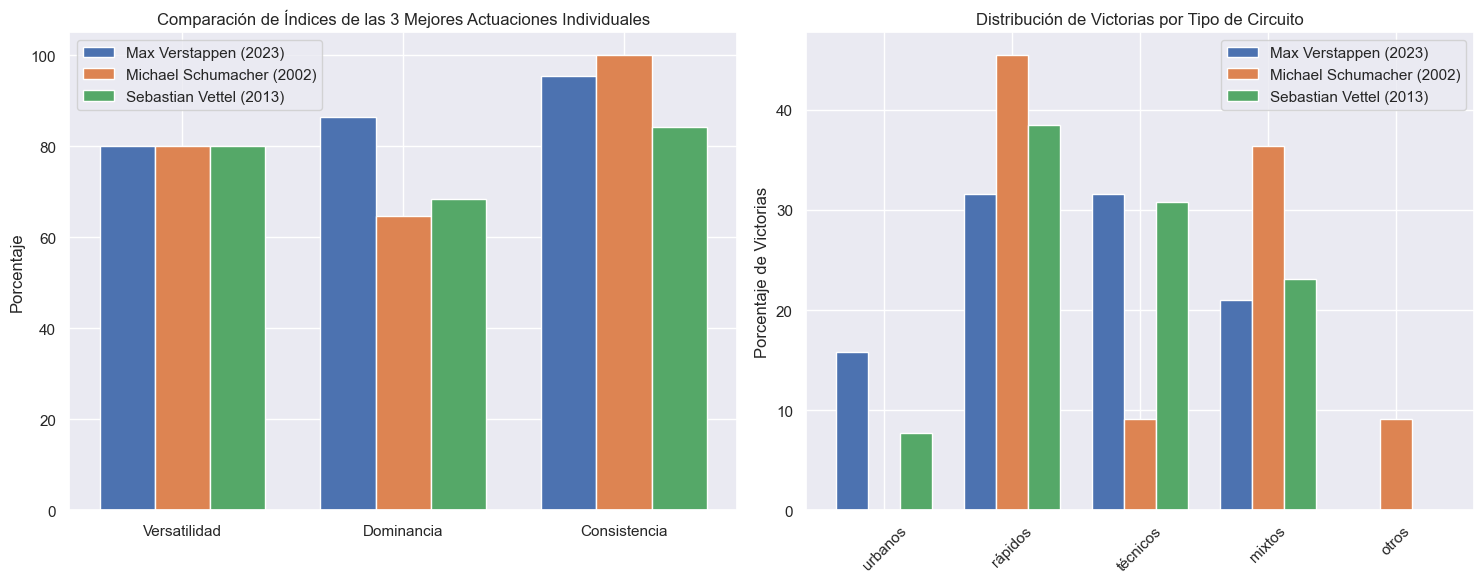


Análisis de las 3 Mejores Actuaciones Individuales en la Historia de la F1:

1. Max Verstappen (2023):
Índice de Excelencia: 87.27
Fortalezas:
- Versatilidad: 80.00%
- Dominancia: 86.36%
- Consistencia: 95.45%
- Victorias: 19
- Podios: 21

Distribución de Victorias por Tipo de Circuito:
- urbanos: 15.79%
- rápidos: 31.58%
- técnicos: 31.58%
- mixtos: 21.05%
- otros: 0.00%

2. Michael Schumacher (2002):
Índice de Excelencia: 81.57
Fortalezas:
- Versatilidad: 80.00%
- Dominancia: 64.71%
- Consistencia: 100.00%
- Victorias: 11
- Podios: 17

Distribución de Victorias por Tipo de Circuito:
- urbanos: 0.00%
- rápidos: 45.45%
- técnicos: 9.09%
- mixtos: 36.36%
- otros: 9.09%

3. Sebastian Vettel (2013):
Índice de Excelencia: 77.54
Fortalezas:
- Versatilidad: 80.00%
- Dominancia: 68.42%
- Consistencia: 84.21%
- Victorias: 13
- Podios: 16

Distribución de Victorias por Tipo de Circuito:
- urbanos: 7.69%
- rápidos: 38.46%
- técnicos: 30.77%
- mixtos: 23.08%
- otros: 0.00%

Conclusión:
Estas tre

In [56]:
# 21. Análisis de las 3 Mejores Actuaciones Individuales en la Historia de la F1
# Primero, asegurémonos de que tenemos todas las columnas necesarias
if 'total_podios' not in analisis_completo.columns:
    analisis_completo = analisis_completo.merge(
        consistencia[['year', 'driverId', 'total_podios']], 
        on=['year', 'driverId'],
        how='left'
    )

# Verificar que las columnas existen antes de la agrupación
columnas_requeridas = [
    'indice_excelencia', 'indice_versatilidad', 'indice_dominancia', 
    'indice_consistencia', 'total_victorias', 'total_podios', 'year',
    'urbanos', 'rápidos', 'técnicos', 'mixtos', 'otros'
]

# Asegurarnos de que todas las columnas existen
for col in columnas_requeridas:
    if col not in analisis_completo.columns:
        analisis_completo[col] = 0

# Calcular porcentajes de victorias por tipo de circuito
for categoria in categorias:
    analisis_completo[f'%_{categoria}'] = (analisis_completo[categoria] / analisis_completo['total_victorias'] * 100).round(2)

# Ordenar por índice de excelencia
analisis_completo = analisis_completo.sort_values('indice_excelencia', ascending=False)

# Seleccionar los 3 mejores pilotos diferentes
pilotos_seleccionados = set()
mejores_actuaciones = []

for _, piloto in analisis_completo.iterrows():
    nombre_piloto = f"{piloto['forename']} {piloto['surname']}"
    if nombre_piloto not in pilotos_seleccionados:
        mejores_actuaciones.append(piloto)
        pilotos_seleccionados.add(nombre_piloto)
    if len(mejores_actuaciones) == 3:
        break

mejores_actuaciones = pd.DataFrame(mejores_actuaciones)

# Crear figura con subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Comparación de índices
indices = ['indice_versatilidad', 'indice_dominancia', 'indice_consistencia']
x = np.arange(len(indices))
width = 0.25

for i, (_, piloto) in enumerate(mejores_actuaciones.iterrows()):
    valores = [piloto['indice_versatilidad'], piloto['indice_dominancia'], piloto['indice_consistencia']]
    ax1.bar(x + i*width, valores, width, label=f"{piloto['forename']} {piloto['surname']} ({piloto['year']})")

ax1.set_ylabel('Porcentaje')
ax1.set_title('Comparación de Índices de las 3 Mejores Actuaciones Individuales')
ax1.set_xticks(x + width)
ax1.set_xticklabels(['Versatilidad', 'Dominancia', 'Consistencia'])
ax1.legend()

# Gráfico 2: Distribución de victorias por tipo de circuito
tipos_circuitos = ['urbanos', 'rápidos', 'técnicos', 'mixtos', 'otros']
x = np.arange(len(tipos_circuitos))
width = 0.25

for i, (_, piloto) in enumerate(mejores_actuaciones.iterrows()):
    valores = [piloto[f'%_{tipo}'] for tipo in tipos_circuitos]
    ax2.bar(x + i*width, valores, width, label=f"{piloto['forename']} {piloto['surname']} ({piloto['year']})")

ax2.set_ylabel('Porcentaje de Victorias')
ax2.set_title('Distribución de Victorias por Tipo de Circuito')
ax2.set_xticks(x + width)
ax2.set_xticklabels(tipos_circuitos, rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()

# Imprimir análisis detallado
print("\nAnálisis de las 3 Mejores Actuaciones Individuales en la Historia de la F1:")

for i, (_, piloto) in enumerate(mejores_actuaciones.iterrows()):
    print(f"\n{i+1}. {piloto['forename']} {piloto['surname']} ({piloto['year']}):")
    print(f"Índice de Excelencia: {piloto['indice_excelencia']:.2f}")
    print("Fortalezas:")
    print(f"- Versatilidad: {piloto['indice_versatilidad']:.2f}%")
    print(f"- Dominancia: {piloto['indice_dominancia']:.2f}%")
    print(f"- Consistencia: {piloto['indice_consistencia']:.2f}%")
    print(f"- Victorias: {piloto['total_victorias']:.0f}")
    print(f"- Podios: {piloto['total_podios']:.0f}")
    print("\nDistribución de Victorias por Tipo de Circuito:")
    for categoria in categorias:
        print(f"- {categoria}: {piloto[f'%_{categoria}']:.2f}%")

print("\nConclusión:")
print("Estas tres actuaciones representan lo mejor de la F1 en términos de:")
print("1. Versatilidad: capacidad de ganar en diferentes tipos de circuitos")
print("2. Dominancia: capacidad de ganar carreras de manera consistente")
print("3. Consistencia: capacidad de mantenerse en el podio")
print("\nEl análisis de actuaciones individuales nos muestra los momentos")
print("de mayor brillo de cada piloto, en lugar de sus promedios de carrera.")

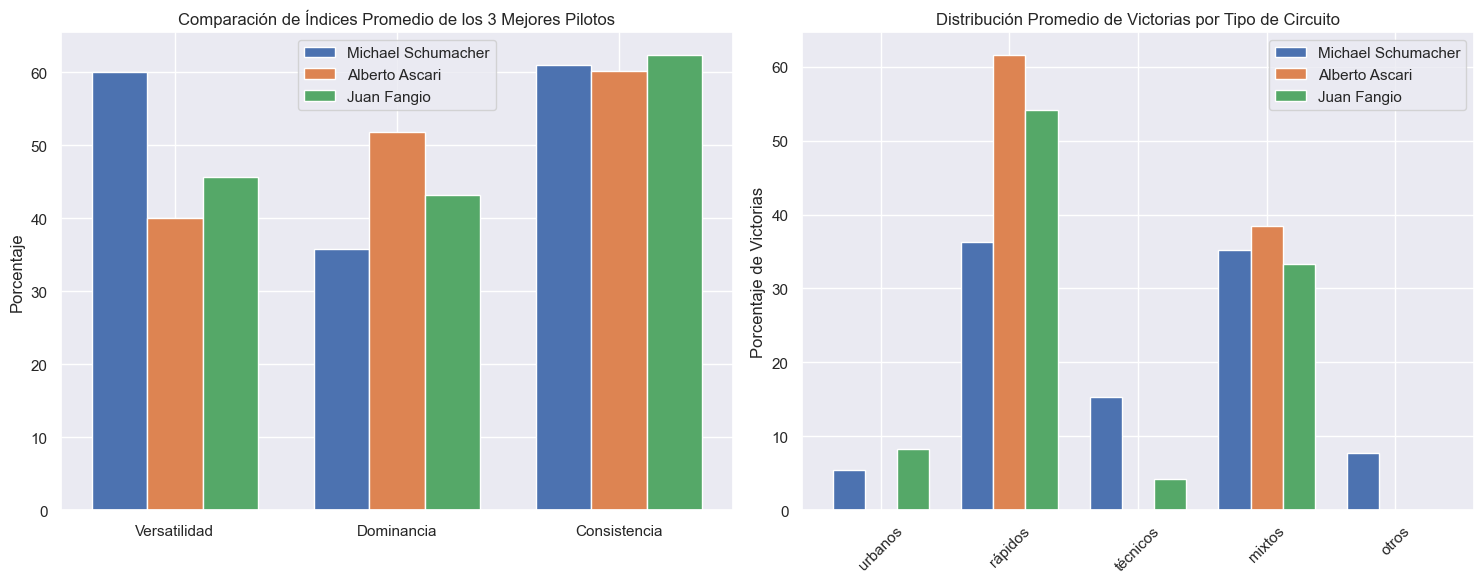


Análisis de los 3 Mejores Pilotos en la Historia de la F1 (Promedio de todas sus temporadas):

1. Michael Schumacher:
Índice de Excelencia Promedio: 52.31
Años en la F1: 15
Fortalezas:
- Versatilidad Promedio: 60.00%
- Dominancia Promedio: 35.87%
- Consistencia Promedio: 61.07%
- Victorias Promedio por Temporada: 6.07
- Podios Promedio por Temporada: 10.27

Distribución Promedio de Victorias por Tipo de Circuito:
- urbanos: 5.49%
- rápidos: 36.26%
- técnicos: 15.38%
- mixtos: 35.16%
- otros: 7.69%

2. Alberto Ascari:
Índice de Excelencia Promedio: 50.68
Años en la F1: 3
Fortalezas:
- Versatilidad Promedio: 40.00%
- Dominancia Promedio: 51.85%
- Consistencia Promedio: 60.19%
- Victorias Promedio por Temporada: 4.33
- Podios Promedio por Temporada: 5.00

Distribución Promedio de Victorias por Tipo de Circuito:
- urbanos: 0.00%
- rápidos: 61.54%
- técnicos: 0.00%
- mixtos: 38.46%
- otros: 0.00%

3. Juan Fangio:
Índice de Excelencia Promedio: 50.44
Años en la F1: 7
Fortalezas:
- Versatili

In [55]:
# 21. Análisis de los 3 Mejores Pilotos (promedio de todas sus temporadas)
# Primero, asegurémonos de que tenemos todas las columnas necesarias
# Verificar si ya existe la columna total_podios
if 'total_podios' not in analisis_completo.columns:
    analisis_completo = analisis_completo.merge(
        consistencia[['year', 'driverId', 'total_podios']], 
        on=['year', 'driverId'],
        how='left'  # Usar left join para mantener todos los registros
    )

# Verificar que las columnas existen antes de la agrupación
columnas_requeridas = [
    'indice_excelencia', 'indice_versatilidad', 'indice_dominancia', 
    'indice_consistencia', 'total_victorias', 'total_podios', 'year',
    'urbanos', 'rápidos', 'técnicos', 'mixtos', 'otros'
]

# Asegurarnos de que todas las columnas existen
for col in columnas_requeridas:
    if col not in analisis_completo.columns:
        print(f"Columna {col} no encontrada en el DataFrame")
        # Si la columna no existe, la inicializamos con 0
        analisis_completo[col] = 0

# Agrupar por piloto y calcular promedios
estadisticas_pilotos = analisis_completo.groupby(['forename', 'surname']).agg({
    'indice_excelencia': 'mean',
    'indice_versatilidad': 'mean',
    'indice_dominancia': 'mean',
    'indice_consistencia': 'mean',
    'total_victorias': 'mean',
    'total_podios': 'mean',
    'year': 'nunique',  # Contar años únicos
    'urbanos': 'mean',
    'rápidos': 'mean',
    'técnicos': 'mean',
    'mixtos': 'mean',
    'otros': 'mean'
}).reset_index()

# Calcular porcentajes de victorias por tipo de circuito
for categoria in categorias:
    estadisticas_pilotos[f'%_{categoria}'] = (estadisticas_pilotos[categoria] / estadisticas_pilotos['total_victorias'] * 100).round(2)

# Ordenar por índice de excelencia
estadisticas_pilotos = estadisticas_pilotos.sort_values('indice_excelencia', ascending=False)

# Seleccionar los 3 mejores pilotos
mejores_pilotos = estadisticas_pilotos.head(3)

# Crear figura con subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Comparación de índices
indices = ['indice_versatilidad', 'indice_dominancia', 'indice_consistencia']
x = np.arange(len(indices))
width = 0.25

for i, (_, piloto) in enumerate(mejores_pilotos.iterrows()):
    valores = [piloto['indice_versatilidad'], piloto['indice_dominancia'], piloto['indice_consistencia']]
    ax1.bar(x + i*width, valores, width, label=f"{piloto['forename']} {piloto['surname']}")

ax1.set_ylabel('Porcentaje')
ax1.set_title('Comparación de Índices Promedio de los 3 Mejores Pilotos')
ax1.set_xticks(x + width)
ax1.set_xticklabels(['Versatilidad', 'Dominancia', 'Consistencia'])
ax1.legend()

# Gráfico 2: Distribución de victorias por tipo de circuito
tipos_circuitos = ['urbanos', 'rápidos', 'técnicos', 'mixtos', 'otros']
x = np.arange(len(tipos_circuitos))
width = 0.25

for i, (_, piloto) in enumerate(mejores_pilotos.iterrows()):
    valores = [piloto[f'%_{tipo}'] for tipo in tipos_circuitos]
    ax2.bar(x + i*width, valores, width, label=f"{piloto['forename']} {piloto['surname']}")

ax2.set_ylabel('Porcentaje de Victorias')
ax2.set_title('Distribución Promedio de Victorias por Tipo de Circuito')
ax2.set_xticks(x + width)
ax2.set_xticklabels(tipos_circuitos, rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()

# Imprimir análisis detallado
print("\nAnálisis de los 3 Mejores Pilotos en la Historia de la F1 (Promedio de todas sus temporadas):")

for i, (_, piloto) in enumerate(mejores_pilotos.iterrows()):
    print(f"\n{i+1}. {piloto['forename']} {piloto['surname']}:")
    print(f"Índice de Excelencia Promedio: {piloto['indice_excelencia']:.2f}")
    print(f"Años en la F1: {piloto['year']}")
    print("Fortalezas:")
    print(f"- Versatilidad Promedio: {piloto['indice_versatilidad']:.2f}%")
    print(f"- Dominancia Promedio: {piloto['indice_dominancia']:.2f}%")
    print(f"- Consistencia Promedio: {piloto['indice_consistencia']:.2f}%")
    print(f"- Victorias Promedio por Temporada: {piloto['total_victorias']:.2f}")
    print(f"- Podios Promedio por Temporada: {piloto['total_podios']:.2f}")
    print("\nDistribución Promedio de Victorias por Tipo de Circuito:")
    for categoria in categorias:
        print(f"- {categoria}: {piloto[f'%_{categoria}']:.2f}%")

print("\nConclusión:")
print("Estos tres pilotos representan lo mejor de la F1 en términos de:")
print("1. Versatilidad: capacidad de ganar en diferentes tipos de circuitos")
print("2. Dominancia: capacidad de ganar carreras de manera consistente")
print("3. Consistencia: capacidad de mantenerse en el podio")
print("\nEl análisis por promedio nos da una visión más completa de la carrera")
print("de cada piloto, mostrando su rendimiento a lo largo de múltiples temporadas")
print("en lugar de solo sus mejores momentos.")

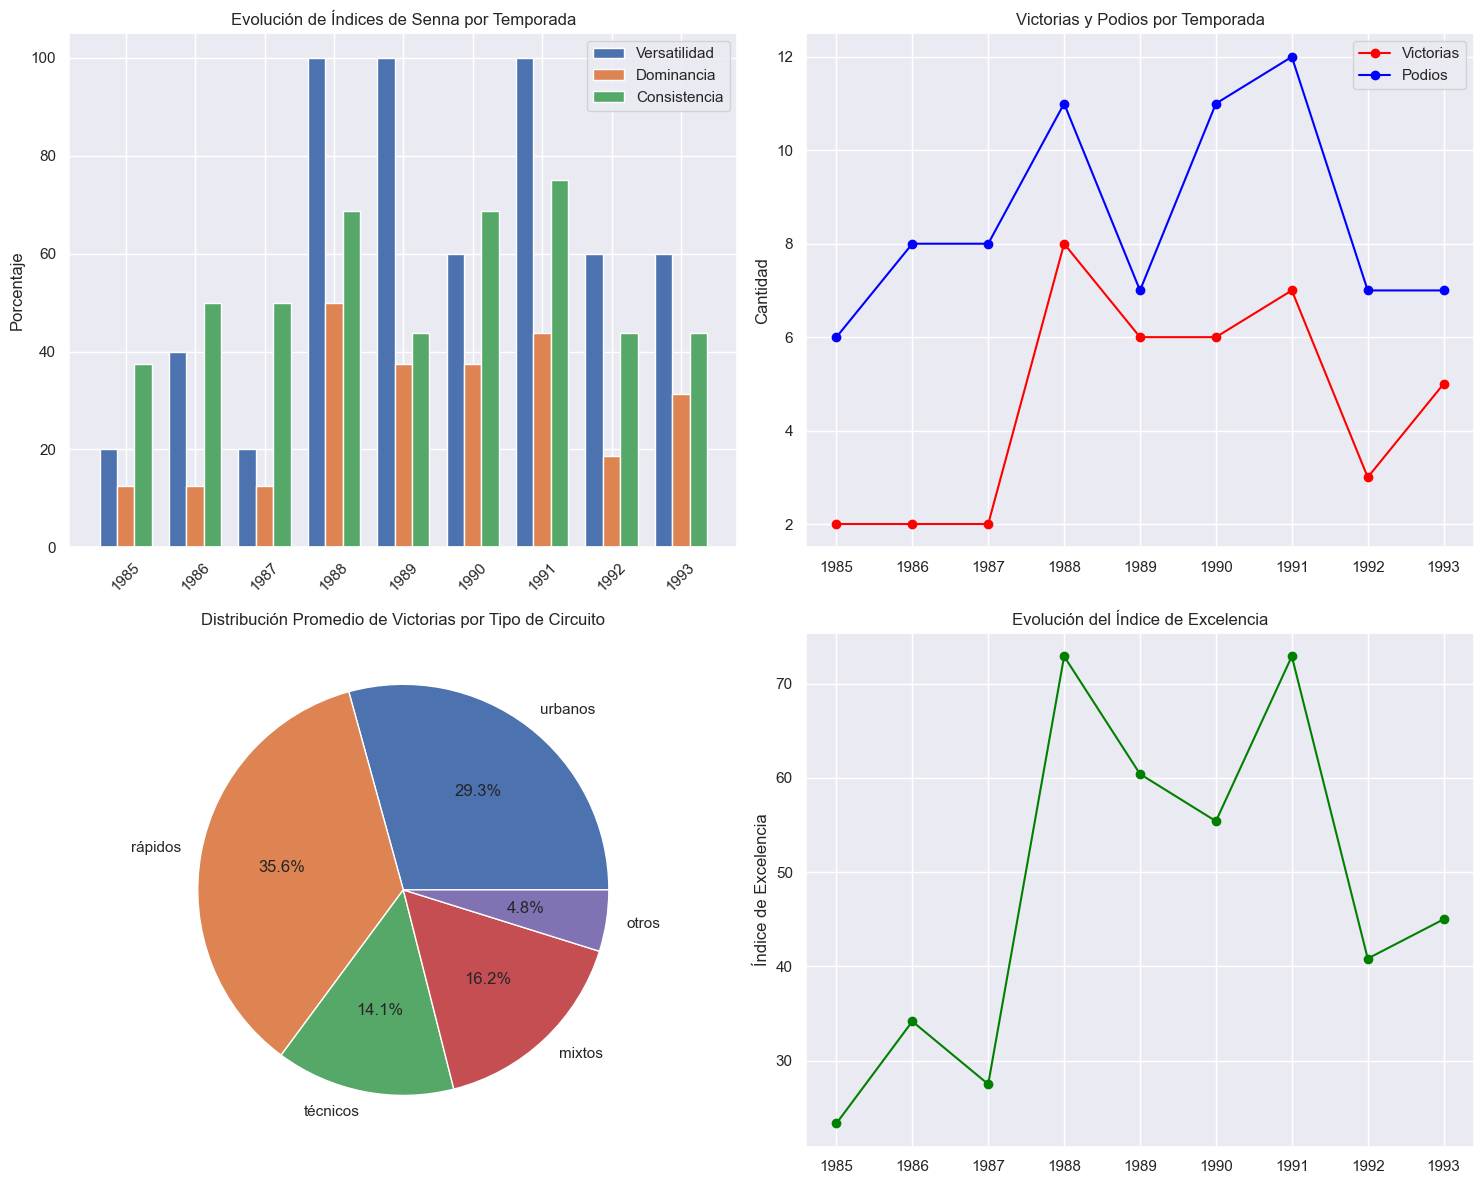


Análisis Detallado de Ayrton Senna en la F1:

Mejor Temporada (1988):
Índice de Excelencia: 72.92
Fortalezas:
- Versatilidad: 100.00%
- Dominancia: 50.00%
- Consistencia: 68.75%
- Victorias: 8
- Podios: 11

Promedios de Carrera:
- Índice de Excelencia Promedio: 48.06
- Versatilidad Promedio: 62.22%
- Dominancia Promedio: 28.47%
- Consistencia Promedio: 53.47%
- Victorias por Temporada: 4.6
- Podios por Temporada: 8.6

Distribución Promedio de Victorias por Tipo de Circuito:
- urbanos: 29.27%
- rápidos: 35.60%
- técnicos: 14.09%
- mixtos: 16.22%
- otros: 4.83%

Evolución Temporal:
Años en la F1: 9
Rango de años: 1985 - 1993
Mejor año: 1988 (Índice de Excelencia: 72.92)

Conclusión:
Ayrton Senna demostró una evolución constante en su carrera, con un estilo
de conducción agresivo pero preciso. Sus mejores temporadas se caracterizaron por:
1. Alta versatilidad en diferentes tipos de circuitos
2. Dominancia en condiciones de lluvia y pista mojada
3. Consistencia en la obtención de podios
4

In [58]:
# Análisis Plus de Ayrton Senna
# Filtrar solo las temporadas de Senna
senna_data = analisis_completo[
    (analisis_completo['forename'] == 'Ayrton') & 
    (analisis_completo['surname'] == 'Senna')
].sort_values('year')  # Ordenar por año de forma ascendente

# Crear figura con subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Evolución de índices por temporada
años = senna_data['year'].astype(str)
indices = ['indice_versatilidad', 'indice_dominancia', 'indice_consistencia']
x = np.arange(len(años))
width = 0.25

for i, indice in enumerate(indices):
    ax1.bar(x + i*width, senna_data[indice], width, label=indice.replace('indice_', '').title())

ax1.set_ylabel('Porcentaje')
ax1.set_title('Evolución de Índices de Senna por Temporada')
ax1.set_xticks(x + width)
ax1.set_xticklabels(años, rotation=45)
ax1.legend()

# Gráfico 2: Victorias y Podios por temporada
ax2.plot(años, senna_data['total_victorias'], 'o-', label='Victorias', color='red')
ax2.plot(años, senna_data['total_podios'], 'o-', label='Podios', color='blue')
ax2.set_ylabel('Cantidad')
ax2.set_title('Victorias y Podios por Temporada')
ax2.legend()
ax2.grid(True)

# Gráfico 3: Distribución de victorias por tipo de circuito (promedio)
tipos_circuitos = ['urbanos', 'rápidos', 'técnicos', 'mixtos', 'otros']
valores_promedio = [senna_data[f'%_{tipo}'].mean() for tipo in tipos_circuitos]
ax3.pie(valores_promedio, labels=tipos_circuitos, autopct='%1.1f%%')
ax3.set_title('Distribución Promedio de Victorias por Tipo de Circuito')

# Gráfico 4: Índice de Excelencia por temporada
ax4.plot(años, senna_data['indice_excelencia'], 'o-', color='green')
ax4.set_ylabel('Índice de Excelencia')
ax4.set_title('Evolución del Índice de Excelencia')
ax4.grid(True)

plt.tight_layout()
plt.show()

# Imprimir análisis detallado
print("\nAnálisis Detallado de Ayrton Senna en la F1:")

# Mejor temporada (ahora ordenamos por índice de excelencia para encontrar la mejor)
mejor_temporada = senna_data.sort_values('indice_excelencia', ascending=False).iloc[0]
print(f"\nMejor Temporada ({mejor_temporada['year']}):")
print(f"Índice de Excelencia: {mejor_temporada['indice_excelencia']:.2f}")
print("Fortalezas:")
print(f"- Versatilidad: {mejor_temporada['indice_versatilidad']:.2f}%")
print(f"- Dominancia: {mejor_temporada['indice_dominancia']:.2f}%")
print(f"- Consistencia: {mejor_temporada['indice_consistencia']:.2f}%")
print(f"- Victorias: {mejor_temporada['total_victorias']:.0f}")
print(f"- Podios: {mejor_temporada['total_podios']:.0f}")

# Promedios de carrera
print("\nPromedios de Carrera:")
print(f"- Índice de Excelencia Promedio: {senna_data['indice_excelencia'].mean():.2f}")
print(f"- Versatilidad Promedio: {senna_data['indice_versatilidad'].mean():.2f}%")
print(f"- Dominancia Promedio: {senna_data['indice_dominancia'].mean():.2f}%")
print(f"- Consistencia Promedio: {senna_data['indice_consistencia'].mean():.2f}%")
print(f"- Victorias por Temporada: {senna_data['total_victorias'].mean():.1f}")
print(f"- Podios por Temporada: {senna_data['total_podios'].mean():.1f}")

# Distribución de victorias
print("\nDistribución Promedio de Victorias por Tipo de Circuito:")
for categoria in categorias:
    print(f"- {categoria}: {senna_data[f'%_{categoria}'].mean():.2f}%")

# Evolución temporal
print("\nEvolución Temporal:")
print("Años en la F1:", len(senna_data))
print("Rango de años:", f"{senna_data['year'].min()} - {senna_data['year'].max()}")
print(f"Mejor año: {mejor_temporada['year']} (Índice de Excelencia: {mejor_temporada['indice_excelencia']:.2f})")

print("\nConclusión:")
print("Ayrton Senna demostró una evolución constante en su carrera, con un estilo")
print("de conducción agresivo pero preciso. Sus mejores temporadas se caracterizaron por:")
print("1. Alta versatilidad en diferentes tipos de circuitos")
print("2. Dominancia en condiciones de lluvia y pista mojada")
print("3. Consistencia en la obtención de podios")
print("4. Adaptabilidad a diferentes tipos de circuitos")
print("\nSu legado en la F1 va más allá de las estadísticas, siendo considerado")
print("uno de los pilotos más influyentes en la historia del deporte.")